<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc"><ul class="toc-item"><li><span><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</span><ul class="toc-item"><li><span><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Структура данных</span></li><li><span><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Цель работы</span></li><li><span><span class="toc-item-num">1.3&nbsp;&nbsp;</span>План работы</span></li></ul></li><li><span><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и исследование данных</span><ul class="toc-item"><li><span><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение функций предобработки данных</span></li><li><span><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных по HYDR</span></li><li><span><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка выборок для обучения и теста</span></li><li><span><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование выборки для обучения</span></li></ul></li><li><span><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей и поиск наилучшей</span><ul class="toc-item"><li><span><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ временных рядов с помощью Python</span></li><li><span><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Экспоненциальное сглаживание, модель Хольта-Винтерса</span></li><li><span><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Двойное экспоненциальное сглаживание</span></li><li><span><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тройное экспоненциальное сглаживание Holt-Winters</span></li><li><span><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Кросс-валидация на временных рядах</span></li><li><span><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Избавление от нестационарности и построение SARIMA</span></li><li><span><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Построение модели SARIMA</li><li><span><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Линейные модели на временных рядах</span></li></ul></li><li><span><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</span><ul class="toc-item"><li><span><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка линейных моделей к обучению и сравнению</span></li><li><span><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение и визуализация моделей</span></li><li><span><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</span></li></ul><li><span><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</span><ul class="toc-item"></ul><ul class="toc-item"><li><span><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка выборок для предсказания цен закрытия с горизонтом</span></li><li><span><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Визуализация предсказаний на наилучшей линейной модели</span></li><li><span><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Визуализация предсказаний на модели SARIMAX в Python</span></li></ul><li><span><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий итог</span></div>

# Прогнозирование временных рядов по биржевым ценам

Прогнозирование цены закрытия с изменяемым горизонтом времени предсказаний

## 1. Описание проекта

Отделу торговли акциями брокерского отделения Инвестбанка для оптимизации риск-менеджмента и стратегии торговли на Московской бирже требуется разработать инструмент прогнозирования цен на ближайшие часы торговой сессии. Необходимо понимание того, как поведут цены торгового инструмента в ближайшие 2 - 3 часа торговли.<br>

Нам были предоставлены исторические данные в формате txt с данными с 10.03.2022 по 20.10.2023, которые были скачаны с помощью торгового терминала Quik. Данным проектом требуется преобразовать полученный txt-файл в читаемый датасет для последующего анализа и обучения. Временной ряд должен использовать цену закрытия каждого периода и объемы продаж. Обучение модели требуется провести на 30-минутных таймфреймах октябрьского фьючерса на нефть. <br>

Требуется выбрать и подобрать такую модель прогнозирования временных рядов, которая сможет с минимальной погрешностью предсказать цены по инструменту с 30-минутным шагом таймфрейма и изменяемым горизонтом предсказаний.<br>

С целью независимой оценки прогнозов на реально проторгованном инструменте в будущем, датасет умышленно решено разделить на 2 независимые подвыборки: 
- первая: тренировочная и валидационная - для обучения модели;
- вторая: тестовая - для сверки работы модели на "боевых" значениях цен.<br>

###  1.1. Структура данных

Данные выгружены в текстовый файл BRX.txt и имеют следующую структуру:<br> 

*Признаки*
 - TICKER — уникальный идентификатор котируемого инструмента;
 - PER — период таймфрейма;
 - DATE — дата;
 - TIME — время;
 - OPEN — цена открытия инструмента;
 - HIGH — максимальная цена периода (свечи);
 - LOW — минимальная цена периода (свечи);
 - VOL — торговый оборот по инструменту.
 
    
*Целевой признак*
 - CLOSE — цена закрытия инструмента.

Источник данных: Терминал Quik

### 1.2. Цель работы

*Целевой признак:* цена закрытия 'close'.<br><br>
*Метрика - коэффициент детерминации:* RMSE.<br>
*Критерии оценки:*
RMSE на тесте должно быть <= 0.1

Необходимо подобрать модель с предельно наименьшим значением *RMSE* - среднеквадратичной ошибки. Чтобы прогнозные данные были максимально качественными,  метрику необходимо сравнить в нескольких итерациях. Заключительная оценка качества модели должна быть выполнена на тестовой выборке.

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения по заданному горизонту предсказания значений.

### 1.3. План работы

 - Загрузить и подготовить данные;<br>
 - Обработать аномалии и пропуски при наличии;<br>
 - Исследовать данные и разделить выборки на тренировочную, валидационную и тестовую;<br>
 - Обучить модели с подбром оптимальных гиперпараметров;<br>
 - Провести финальное тестирование и оценить качество прогнозных данных;<br>
 - Довести до заказчика результаты исследования и представить модель прогнозирования цен по инструментам торговли.<br>

## 2. Загрузка и исследование данных

In [1]:
# установим pmdarima
#!pip install pmdarima
#!pip install statsmodels
%matplotlib inline

# импорт библиотек
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import inspect

from datetime import date, datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from tqdm import notebook, tqdm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
import itertools
from itertools import product

# Загрузка моделей
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
    KFold,
    TimeSeriesSplit
)
from sklearn.linear_model import (
    Ridge,
    Lars, 
    TheilSenRegressor, 
    HuberRegressor, 
    LinearRegression, 
    PassiveAggressiveRegressor, 
    ARDRegression,
    BayesianRidge,
    ElasticNet,
    OrthogonalMatchingPursuit
)
from sklearn.ensemble import RandomForestRegressor
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.dummy import DummyRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeRegressor

# Импорт метрик
from sklearn.metrics import (
    mean_absolute_error as mse,
    r2_score, 
    make_scorer,
    PredictionErrorDisplay,
    RocCurveDisplay, 
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_squared_log_error
)

# "Погашение" предупреждений
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Фиксация стартового времени начала проекта
start_all = time.time()

# Определение констант
RANDOM_STATE = 28082023
# разбиение на подвыборки для кросс-валидации
CV = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
# Размер скользящей средней (для дневок - это срез недельный)
mov_average = 168 # недельный почасовой сдвиг (24ч * 7 дней)
# Горизонт прогнозирования в часах вперед
HOUR = 1
# Кол-во строк для прогнозирования
DELTA = 24
# Срез по кол-ву дней по выборке для обучения и предсказаний
TIME_LEARN = 43800 # Это равно 5 лет: 43800 / (24ч * 360дн)
# Максимальный размер отставания max_lag по кол-ву получасовок в сутках
m_lag = 168
# Шаг прогнозирования
frequency = '1h'

### 2.1. Определение функций предобработки данных

In [3]:
# функция загрузки датасета
def load_data(data):
    df = pd.read_csv(data + '.txt')
    df.to_csv(data + '.csv', sep='@')
    return df

In [4]:
# Функция чтения датасета
def get_data_info(data):
    display(data.head(1))
    display(data.info())

In [5]:
# Функция вычисления пропущенных значений датасета
def missing_values_table(data):
        # Общее количество пропусков
        mis_val = data.isnull().sum()
        
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Создание таблицы с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование колонок
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропуски', 1 : 'Доля, %'})
        
        # Сортировка значений по доле пропусков
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Доля, %', ascending=False).round(1)
        
        # Печать общей информации
        print ("Выбранный датафрейм имеет " + str(data.shape[1]) + " столбцов.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов имеют пропуски значений.")
        
        # Return
        return mis_val_table_ren_columns

In [6]:
# Функция определения крайних значений дат

def aux_retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def checking_dates(data):
    print('--------- Анализ таблицы ----------')
    print('Имя DataFrame: "{}"'.format(aux_retrieve_name(data)))
    #print('Memory usage: {:03.2f} MB'.format(df.memory_usage(deep=True).sum() / 1024 ** 2))
    if data.index.min() == 0:
        print('Минимальная дата в таблице : ', data['<DATE>'].min(), '\n'
              'Максимальная дата в таблице : ', data['<DATE>'].max())
    else:
        print('Минимальная дата в таблице : ', data.index.min(), '\n'
              'Максимальная дата в таблице : ', data.index.max())    
    return

In [7]:
# Функция визуализации данных для исследования признаков
def grafik(df, col):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    title_col_box = 'Диаграмма "ящик с усами" ' + col
    title_col_gist = 'Гистограмма данных ' + col
    title_col_kde = 'Распределение данных ' + col
    sns.boxplot(x=col, data=df, color='red', ax=ax1).set(title=title_col_box)
    histos = df[col].hist(bins=20, color='blue', ax=ax2).set(title=title_col_gist, 
                            xlabel="Объем", ylabel=col)
    # Построим распределение значений на графике
    sns.kdeplot(data=df[[col]], fill=True, color='blue', ax=ax3)
    plt.title(title_col_kde)
    plt.xlabel(col)
    plt.ylabel('Плотность')
    print(df[col].describe())
    return

### 2.2. Предобработка данных по HYDR

Подгружаем скачанный с QUIK торговый файл по РусГидро с размером таймфрейма 1 час.

In [8]:
df_before = load_data('РусГидро [Price] - 60min')

Первое знакомство с данными, выгруженными в таблицу df_before

In [9]:
get_data_info(df_before)

<TICKER>  <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0  HYDR [TQBR]     60  20181108  180000  0.5531  0.5537  0.5505   0.5512   

     <VOL>  
0  56992.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  6008 non-null   object 
 1   <PER>     6008 non-null   int64  
 2   <DATE>    6008 non-null   int64  
 3   <TIME>    6008 non-null   int64  
 4   <OPEN>    6008 non-null   float64
 5   <HIGH>    6008 non-null   float64
 6   <LOW>     6008 non-null   float64
 7   <CLOSE>   6008 non-null   float64
 8   <VOL>     6008 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 422.6+ KB


None

Проверка пропущенных данных в датасете

In [10]:
missing_values_table(df_before)

Выбранный датафрейм имеет 9 столбцов.
Из них 0 столбцов имеют пропуски значений.


Empty DataFrame
Columns: [Пропуски, Доля, %]
Index: []

Идеальные данные с точки зрения готовности датасета к анализу и обучению.<br>

Чтобы привести все наименования столбцов и признаков к стандарным значениям в стиле snake_case, воспользуемся ещё одной функцией предобработки исходного датасета во временной ряд с DatetimeIndex.

In [11]:
# Функция предобработки исходного датасета во временной ряд с DatetimeIndex

def preprocessing_data(data):
    data_columns = {
    '<TICKER>': 'ticker',
    '<PER>': 'per',
    '<DATE>': 'date',
    '<TIME>': 'time',
    '<OPEN>': 'open',    
    '<HIGH>': 'high', 
    '<LOW>': 'low', 
    '<CLOSE>': 'close',
    '<VOL>': 'volume',    
    }
    
    data = data.rename(columns=data_columns)
    """
    В датасете в процессе чтения данных имеются столбцы 'time' со значениями времени 
    как в 5-значном формате (8:30:00), так и в 6-значном (12:00:00). С точки зрения дальнейшего 
    преобразования двух столбцов в признак 'datetime', такая путаница внесет существенные проблемы 
    при преобразовании значений времени в 'datetime64[ns]'.
    """
    # Проверка кол-ва значений в столбце 'time' в формате "5Х" (Х:ХХ:ХХ).
    count = data['time'].astype(str).apply(len).copy()
    df = pd.DataFrame(data['time'].astype(str).apply(len).copy())
    # Создание столбца с названием 'lenght'.
    df.set_axis(['lenght'], axis=1, inplace=True)
    print('Кол-во значений time в формате "5Х" было выявлено:', df[df['lenght'] == 5].count().tolist())
    count = 0
    
    # Процедура стандартизации признака time в формат "6Х" (ХХ:ХХ:ХХ)
    data['time'] = data['time'].astype(str)
    for col in data['time']:
        if len(col) == 5:
            data.loc[data['time'] == col, 'time'] = "0" + col

    """
    Задача проекта заключается в работе с временными рядами. 
    Поэтому нам потребуется тип данных формата datetime64[ns], 
    который необходимо будет преобразовать дополнительно в index.
    Сначала нужно склеить 'date' и 'time' в один столбец и изменить 
    на тип datetime.
    """
    data['time'] = data['time'].astype(int)
    # Проверка столбца 'time' на наличии или отсутствие данных (актуально для 1D таймфрейма)    
    if data['time'].sum() == 0:
        data['datetime'] = data['date'].astype(str) + ' 00:00:00'
    else:
        data['datetime'] = data['date'].astype(str) + ' ' + data['time'].astype(str)
        
    # Переформатируем столбец на тип данных на datetime64[ns]
    data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
    print('Изменено: ', data[(data['datetime'].dt.hour <= 9) & (data['datetime'].dt.second == 0)].shape[0], 'строк.') 
    data.set_index('datetime', inplace=True)
    # Создаём столбец усреднённой цены для борьбы с мультиколлинеарностью    
    # data['price'] = (data['high'] + data['low'])/2
    # Срез временной для выборки тренировочной
    data = data[data.index >= (datetime.today() - timedelta(hours=TIME_LEARN))]
    return data

Обработаем данные таблицы функцией preprocessing_data

In [12]:
timedelta(hours=TIME_LEARN)

datetime.timedelta(days=1825)

In [13]:
df_before = preprocessing_data(df_before)
df_before.head(1)

Кол-во значений time в формате "5Х" было выявлено: [500]
Изменено:  0 строк.


ticker  per      date    time    open    high  \
datetime                                                                  
2018-11-19 12:00:00  HYDR [TQBR]   60  20181119  120000  0.5392  0.5403   

                        low   close   volume  
datetime                                      
2018-11-19 12:00:00  0.5383  0.5396  32356.0

In [14]:
checking_dates(df_before)

--------- Анализ таблицы ----------
Имя DataFrame: "['df_before']"
Минимальная дата в таблице :  2018-11-19 12:00:00 
Максимальная дата в таблице :  2023-11-01 16:00:00


### 2.3. Подготовка выборок для обучения и теста

Подготовка датасета для тренировочной и валидационной выборок

In [15]:
# Выгрузка начальной даты из исходного датасета
start=df_before.index.min()

# Рассчет конечной даты для обучаемой выборки
end=(df_before.index.max()-(pd.to_timedelta(pd.np.ceil(30), unit="d")))

end

Timestamp('2023-10-02 16:00:00')

In [16]:
(pd.to_timedelta(pd.np.ceil(4), unit="d"))

Timedelta('4 days 00:00:00')

In [17]:
# Создание датасета для тренировочной и валидационной выборок
df_features = df_before[(df_before.index >= start) & (df_before.index < end)]

In [18]:
df_features = df_features[['close']]
checking_dates(df_features)
get_data_info(df_features)

--------- Анализ таблицы ----------
Имя DataFrame: "['df_features']"
Минимальная дата в таблице :  2018-11-19 12:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00


close
datetime                   
2018-11-19 12:00:00  0.5396

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5142 entries, 2018-11-19 12:00:00 to 2023-10-02 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   5142 non-null   float64
dtypes: float64(1)
memory usage: 80.3 KB


None

Проверка временной последовательности распределения данных функцией исследования монотонности

In [19]:
display(df_features.index.is_monotonic)

True

In [20]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5142 entries, 2018-11-19 12:00:00 to 2023-10-02 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   5142 non-null   float64
dtypes: float64(1)
memory usage: 80.3 KB


Подготовка выборки для финального теста

In [21]:
# Определение начальной даты для тестовой выборки из исходного датасета
start=end #+(pd.to_timedelta(pd.np.ceil(30), unit="m"))

# Расчет конечной даты для тестовой выборки
end=df_before.index.max()

# Создание тестовой выборки
df_test = df_before[(df_before.index >= start) & (df_before.index <= end)]

In [22]:
df_test = df_test[['open', 'high', 'low', 'close', 'volume']]
checking_dates(df_test)
get_data_info(df_test)

--------- Анализ таблицы ----------
Имя DataFrame: "['df_test']"
Минимальная дата в таблице :  2023-10-02 16:00:00 
Максимальная дата в таблице :  2023-11-01 16:00:00


open    high     low   close    volume
datetime                                                     
2023-10-02 16:00:00  0.8564  0.8566  0.8509  0.8531  117834.0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2023-10-02 16:00:00 to 2023-11-01 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    309 non-null    float64
 1   high    309 non-null    float64
 2   low     309 non-null    float64
 3   close   309 non-null    float64
 4   volume  309 non-null    float64
dtypes: float64(5)
memory usage: 14.5 KB


None

### 2.4. Исследование выборки для обучения

Записи стали вполне корректными. Датасет и признаки предобработаны. Вместо цен High и Low была рассчитала средняя арифмитеская цена нефти (скользящее среднее). Можно приступать к анализу данных и подготовке временных рядов к машинному обучению

In [23]:
missing_values_table(df_features)

Выбранный датафрейм имеет 1 столбцов.
Из них 0 столбцов имеют пропуски значений.


Empty DataFrame
Columns: [Пропуски, Доля, %]
Index: []

In [24]:
# Удаляем оставшиеся пропуски в скользящей средней
df_features = df_features.dropna()

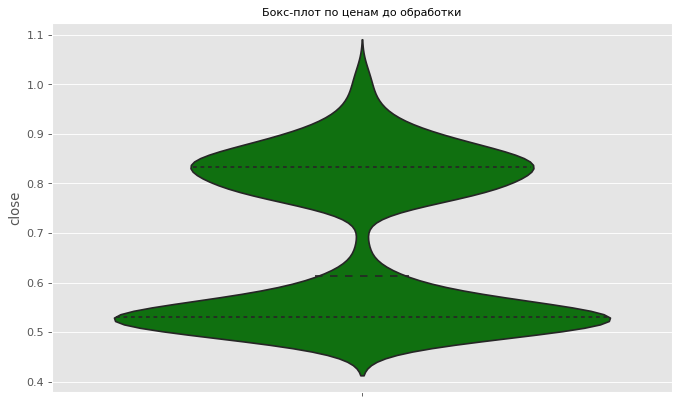

In [25]:
# Распечатка Бокс-плота
plt.figure(figsize=(10,6), dpi=80)
sns.violinplot(y='close', data=df_features, scale='width', inner='quartile', color="green", grid=True)
plt.title('Бокс-плот по ценам до обработки', fontsize=10)
plt.show()

Как таковых выборос в цене актива конечно нет, хотя распределение похоже на ската. По даиграмме видно, что в области 0,7 наблюдается янвый провал данных. Изучим глуюже датасет.

#### 2.4.1. Изучение признака 'close'

count    5142.000000
mean        0.683885
std         0.158772
min         0.470200
25%         0.531225
50%         0.613000
75%         0.834175
max         1.033600
Name: close, dtype: float64


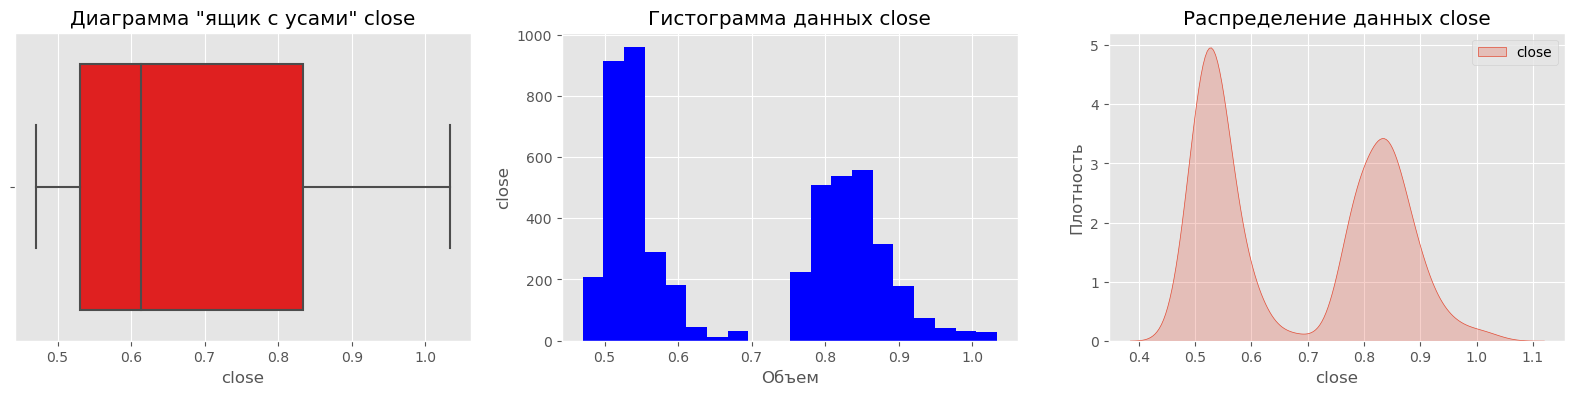

In [26]:
grafik(df_features, 'close')

#### 2.4.2. Изучение распределения объемов продаж

--------- Анализ таблицы ----------
Имя DataFrame: "['df_features']"
Минимальная дата в таблице :  2018-11-19 12:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00


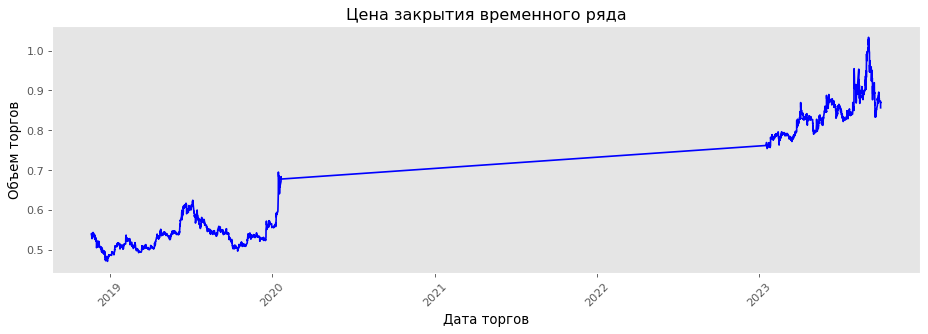

In [27]:
plt.figure(figsize=(14,4), dpi=80)
plt.plot(df_features.close, "blue", label="Цена закрытия")
plt.title("Цена закрытия временного ряда")
plt.xlabel('Дата торгов', fontsize=12, color='black')
plt.ylabel('Цена', fontsize=12, color='black')
plt.ylabel('Объем торгов')
plt.rc('xtick', labelsize=8) 
plt.xticks(rotation = 45)
plt.grid()
checking_dates(df_features)   

Ну вот она и аномалия. Придется анализировать временной ряд с начала 2023 года. В истории РусГидро имеется 3-годичный пробел. 

In [28]:
df_train = df_features['2023-01-01':]
checking_dates(df_train)   

--------- Анализ таблицы ----------
Имя DataFrame: "['df_train']"
Минимальная дата в таблице :  2023-01-18 10:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00


#### 2.4.3. Исследование цены закрытия на выборке для обучения

In [29]:
mov_average = 24 # недельный почасовой сдвиг (24ч * 7 дней)

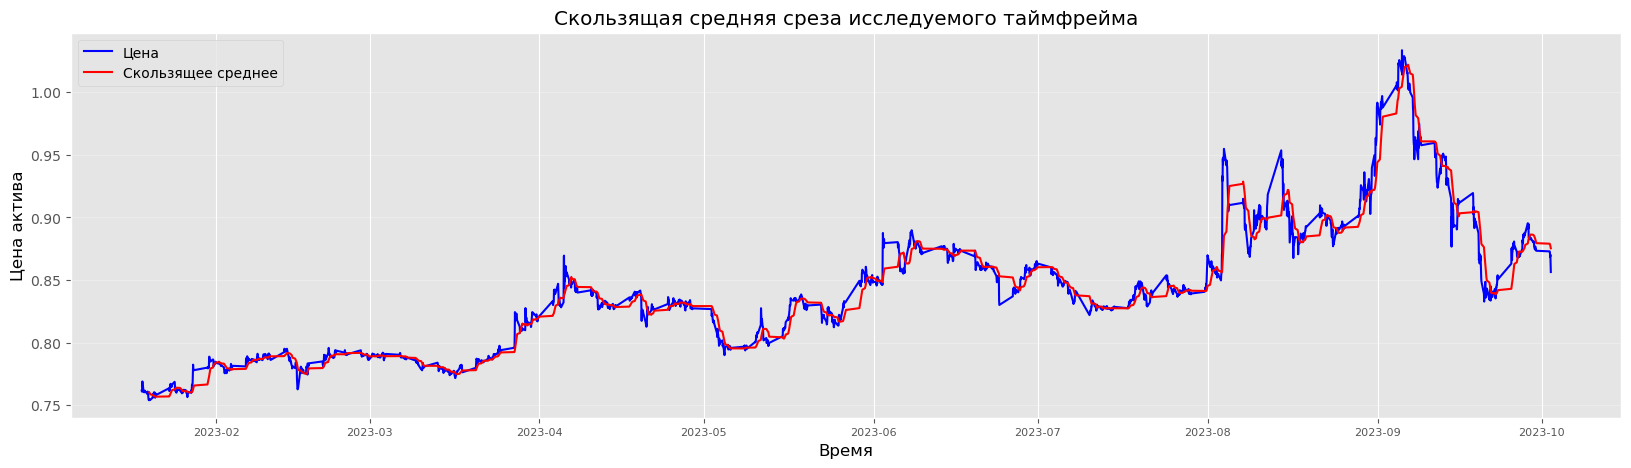

In [30]:
df_train['rolling_mean_close'] = df_train['close'].rolling(mov_average).mean()
plt.figure(figsize=(20, 5))
plt.plot(df_train['close'], "blue", label="Цена")
plt.plot(df_train['rolling_mean_close'], "red", label="Скользящее среднее")
plt.title("Скользящая средняя среза исследуемого таймфрейма")
plt.xlabel('Время', fontsize=12, color='black')
plt.ylabel('Цена актива', fontsize=12, color='black')
plt.grid(axis='y', alpha=.3)
plt.legend()
plt.show()
df_train = df_train.drop('rolling_mean_close', axis=1)

#### 2.4.5. Стандартное отклонение цены закрытия на выборке для обучения

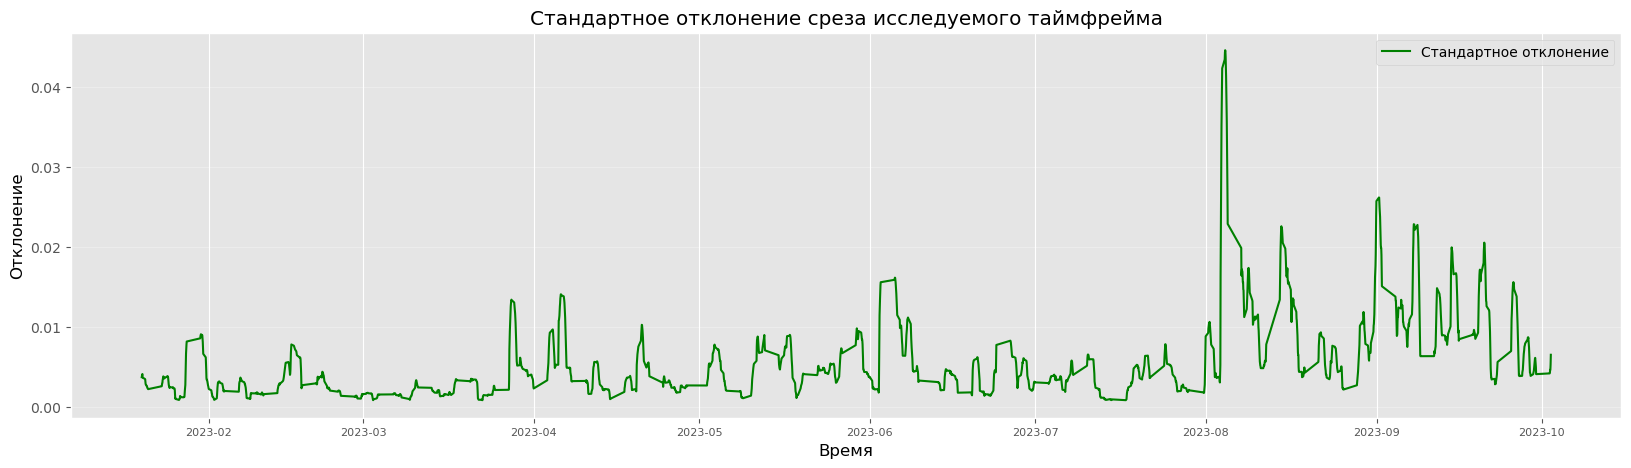

In [31]:
df_train['std'] = df_train['close'].rolling(mov_average).std()
plt.figure(figsize=(20, 5))
plt.plot(df_train['std'], "green", label="Стандартное отклонение")
plt.title("Стандартное отклонение среза исследуемого таймфрейма")
plt.xlabel('Время', fontsize=12, color='black')
plt.ylabel('Отклонение', fontsize=12, color='black')
plt.grid(axis='y', alpha=.3)
plt.legend()
plt.show()
# после построения графика сразу же удалим столцы 'mean' и 'std',
# чтобы затем можно было проанализировать без ошибок сезонность
df_train = df_train.drop('std', axis=1)

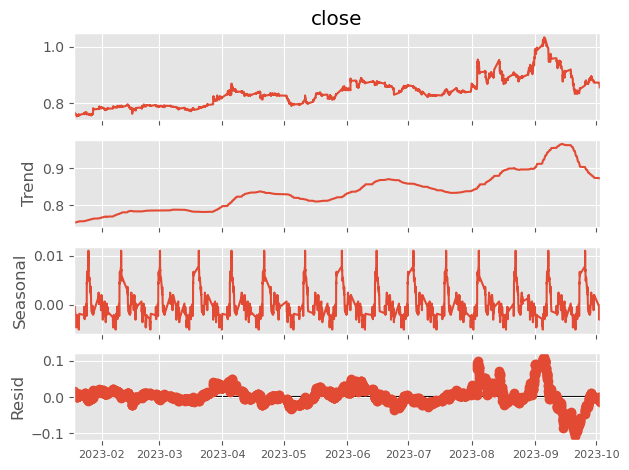

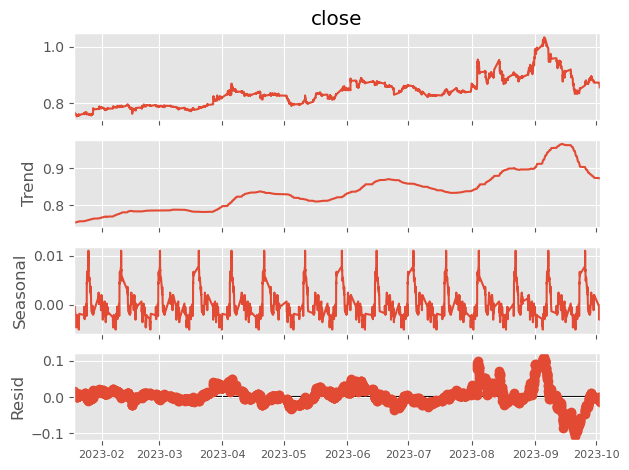

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(
    df_train['close'], 
    model="additive", 
    extrapolate_trend='freq', 
    period=int(24*7),
    two_sided=False
)
decompose_data.plot()

<Axes: xlabel='datetime'>

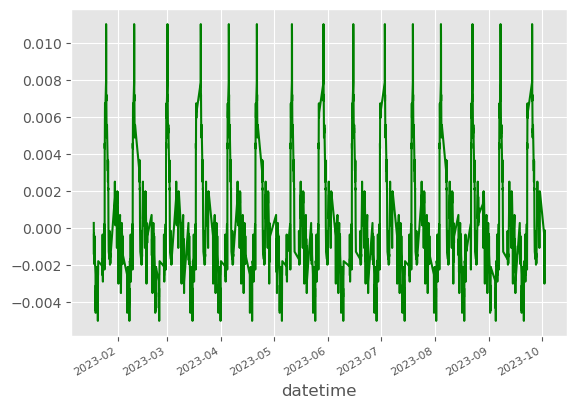

In [33]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

Я думаю, теперь мы можем легко увидеть эффект сезонности в наших временных рядах. На изображении выше мы извлекли сезонность из временного ряда.

Для прогнозирования с использованием моделей ARIMA нам потребовался стационарный временной ряд. Стационарный временной ряд — это временной ряд, на который не влияют эти четыре компонента. Чаще всего это происходит, когда данные нестационарны, и прогнозы, которые мы получаем от модели ARIMA, хуже или не настолько точны.

Если данные нестационарны, мы можем сделать одно: либо сделать данные стационарными, либо использовать модель SARIMAX.

Чтобы узнать больше о стационарности временного ряда, мы можем выполнить тест ADfuller. Это тест, основанный на гипотезе, где, если значение $p < 0,05$, то мы можем считать временной ряд стационарным, а если значение $p > 0,05$, то можно утверждать, что временной ряд нестационарен. 

In [34]:
# Выполнение теста Adfuller на данных
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_train['close'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.0607924189792524
2. P-Value :  0.26056947269257325
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2481
5. Critical Values :
	 1% :  -3.4329884839681255
	 5% :  -2.8627056642784483
	 10% :  -2.567390528901554


Здесь мы видим, что значение $p-value$ выше для нашего набора данных, и мы можем сказать, что доказательства нулевой гипотезы низки. Cледовательно, временной ряд нестационарен. Можно сделать временной ряд более стационарным с помощью разностных методов. В этом случае мы продолжим использовать методы скользящего среднего различия. Часто для данных, в которых влияние сезонности избыточно, мы используем разность скользящих средних.

Применение разности скользящего среднего

<Axes: title={'center': 'original'}, xlabel='datetime'>

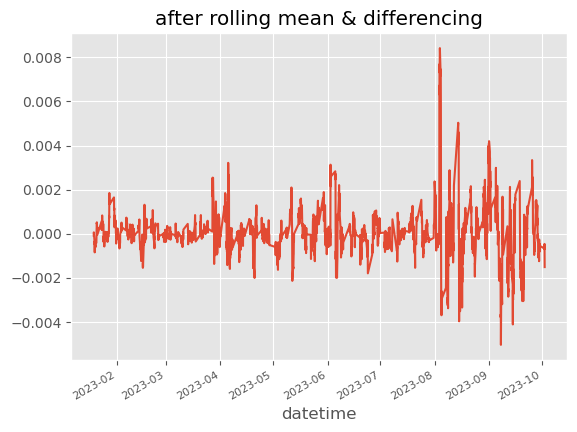

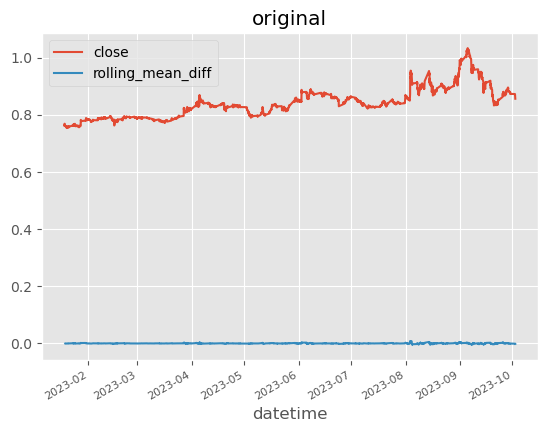

In [35]:
rolling_mean = df_train['close'].rolling(window = 12).mean()
df_train['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df_train['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df_train.plot(title='original')

Здесь мы можем видеть на графике сезонность до и после дифференцирования. Мы видим, что нам удалось значительно снизить сезонность. Мы также можем перейти к тесту Адфуллера, где мы можем сравнить значение p.

In [36]:
dftest = adfuller(df_train['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

df_before = df_train.drop('rolling_mean_diff', axis=1)

1. ADF :  -7.8290367082917625
2. P-Value :  6.3658874822027824e-12
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2460
5. Critical Values :
	 1% :  -3.4330110311801567
	 5% :  -2.862715621038473
	 10% :  -2.5673958300284223


Мы видим, что значение p близко к нулю и очень меньше 0,05. Таким образом, теперь наш временной ряд стационарен. Итак, после всех этих процессов мы можем перейти к моделированию. 

Данным разделом подготовлены две выборки df_features - для обучения и валидации моделей, и df_test - для проверки модели на неизвестных для неё будущих данных. Сам выборки представлены ниже.

In [37]:
checking_dates(df_features) 
checking_dates(df_train)
checking_dates(df_test) 

--------- Анализ таблицы ----------
Имя DataFrame: "['df_features']"
Минимальная дата в таблице :  2018-11-19 12:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00
--------- Анализ таблицы ----------
Имя DataFrame: "['df_train']"
Минимальная дата в таблице :  2023-01-18 10:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00
--------- Анализ таблицы ----------
Имя DataFrame: "['df_test']"
Минимальная дата в таблице :  2023-10-02 16:00:00 
Максимальная дата в таблице :  2023-11-01 16:00:00


### Выводы

<div style="border:solid gray 3px; padding: 20px">
Выводы по предобработке данных:<br>

- Названия столбцов приведены к стандартному виду в стиле snake_case phyton.
- Обработаны признаки даты и времени с созданием временного ряда с Datetimeindex.
- Удалены лишние признаки, которые не потребуются в решении задачи.
- Проведены дополнительные вычисления с добавлением средней скользящей цены.
- Изучены основные признаки, по графикам распределения значений и сводной статистике данных в ценах закрытия 'close' выбросы отсутствуют. Стандартное отклонение по цене имеет ненормальное распределение.
- Построены графики сезонности и проверен тест Дики Фуллера на стационарность рядов.

Финальный датасет отвечает условиям задачи и готов к обучению. Признаки подготовлены.
    
Цель данного проекта состоит не просто в поиске наилучшей модели, но и в тестировании полученной модели на выборке будущего. Для этих целей исходный датафрейм, в нашем случае df_before, был поделен на 2 части: тренировочную df_feature и тестовую df_test. Причем из тренировочной выборки тестовая выборка df_test сформирована из данных за последние 30 дней торговли инструментом.

## 3. Теория сглаживаний или борьба за стационарность

In [38]:
# Оставляем в тренировочной выборке только цену закрытия
df_train = df_train[['close']]

### 3.1. Анализ временных рядов с помощью Python

На практике специалистам ежедневно приходится сталкиваться с теми или иными задачами, связанными с временными рядам. Чаще всего возникает вопрос — а что у нас будет происходить с нашими показателями в ближайший день/неделю/месяц/ — сколько товара купят, сколько из них онлайн и оффлайн, как много действий совершат пользователи, и так далее. К задаче прогнозирования можно подходить по-разному, в зависимости от того, какого качества должен быть прогноз, на какой период мы хотим его строить, и, конечно, как долго нужно подбирать и настраивать параметры модели для его получения.

Прежде, чем перейти к построения моделей, начнем с простых методов анализа и прогнозирования — скользящих средних, сглаживаний и их вариаций.

***Движемся, сглаживаем и оцениваем***

Временной ряд – это последовательность значений, описывающих протекающий во времени процесс, измеренных в последовательные моменты времени, обычно через равные промежутки
Таким образом, данные оказываются упорядочены относительно неслучайных моментов времени, и, значит, в отличие от случайных выборок, могут содержать в себе дополнительную информацию, которую мы постараемся извлечь.


Нужные библиотеки импортированы. В основном нам понадобится модуль statsmodels, в котором реализованы многочисленные методы статистического моделирования, в том числе для временных рядов.

Для работы возьмем реальные данные по дневному таймфрейму

In [39]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [40]:
plotly_df(df_train, title = "Актив РусГидро")

In [41]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Скользящая средняя Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "r", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series[n:], color="#2F539B", label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

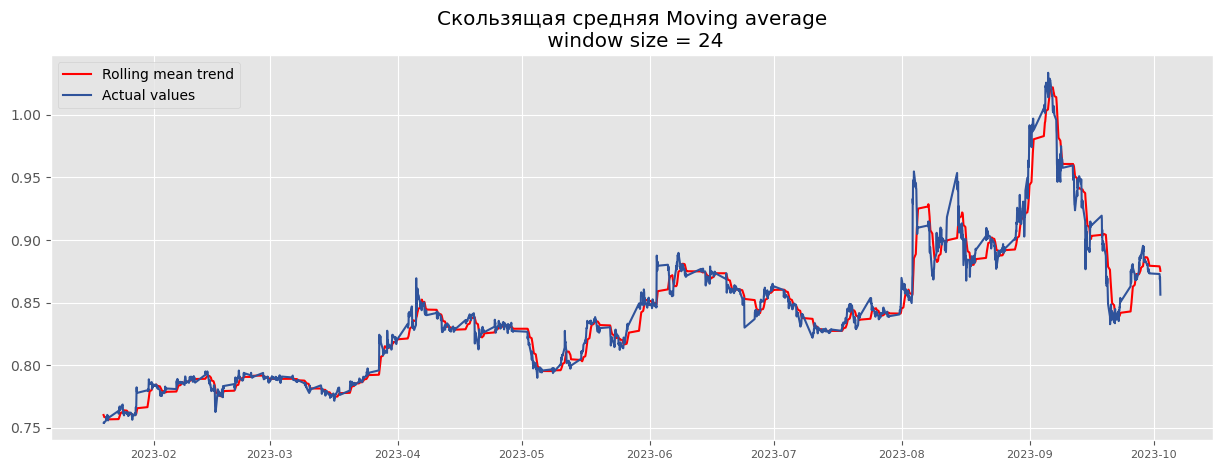

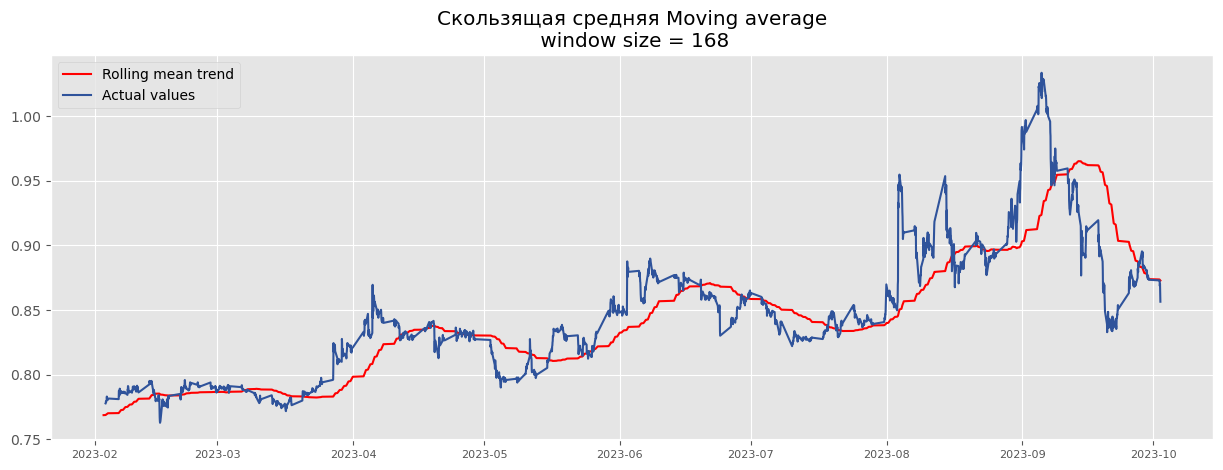

In [42]:
plotMovingAverage(df_train, 24) # сглаживаем по дням
plotMovingAverage(df_train, 24*7) # сглаживаем по неделям

### 3.2. Экспоненциальное сглаживание, модель Хольта-Винтерса

Продолжим на простом экспоненциальном сглаживании. Посмотрим, что произойдёт, если вместо взвешивания последних $n$ значений ряда мы начнем взвешивать все доступные наблюдения, при этом экспоненциально уменьшая веса по мере углубления в исторические данные. 

В этом нам поможет формула простого экспоненциального сглаживания:

$ȳ_{t} = α * y_{t} + (1 - α) * ȳ_{t-1}$

Здесь модельное значение представляет собой средневзвешенную между текущим истинным и предыдущим модельным значениями. Вес $\alpha$ называется сглаживающим фактором. Он определяет, как быстро мы будем "забывать" последнее доступное истинное наблюдение. Чем меньше $\alpha$, тем больше влияния оказывают предыдущие модельные значения, и тем сильнее сглаживается ряд.

Экспоненциальность скрывается в рекурсивности функции — каждый раз мы умножаем $(1-\alpha)$ на предыдущее модельное значение, которое, в свою очередь, также содержало в себе $(1-\alpha)$, и так до самого начала.

In [43]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # первое значение совпадает с началом ряда
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

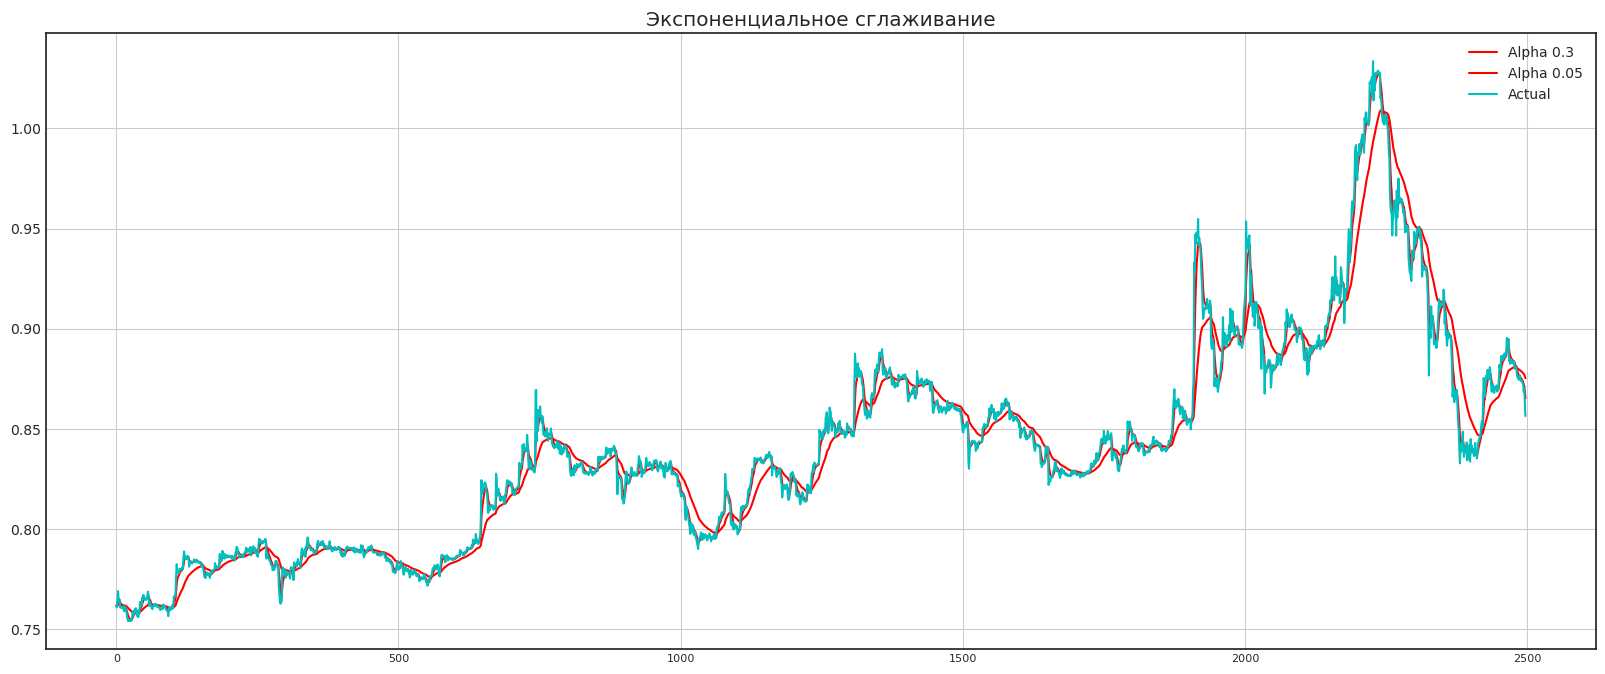

In [44]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(df_train.close, alpha), "r", label="Alpha {}".format(alpha))
    plt.plot(df_train.close.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Экспоненциальное сглаживание")
    plt.grid(True)

### 3.3. Двойное экспоненциальное сглаживание

До сих пор можно было получить от предыдущих методов в лучшем случае прогноз лишь на одну точку вперёд (и ещё красиво сгладить ряд), это здорово, но недостаточно, поэтому переходим к расширению экспоненциального сглаживания, которое позволит строить прогноз сразу на две точки вперед (и тоже красиво сглаживать ряд).

В этом поможет разбиение ряда на две составляющие — уровень (level, intercept) $\ell$ и тренд $b$ (trend, slope). Уровень, или ожидаемое значение ряда, мы предсказывали при помощи предыдущих методов, а теперь такое же экспоненциальное сглаживание применим к тренду, наивно или не очень полагая, что будущее направление изменения ряда зависит от взвешенных предыдущих изменений.

$l_{x} = α * y_{x} + (1 - α) * (l_{x-1} + b_{x-1})$

$b_{x} = β * (l_{x} - l_{x-1}) + (1 - β) * b_{x-1}$

$ȳ_{x + 1} = l_{x} + b_{x}$

В результате получаем набор функций. 

Первая описывает уровень — он, как и прежде, зависит от текущего значения ряда, а второе слагаемое теперь разбивается на предыдущее значение уровня и тренда. 

Вторая отвечает за тренд — он зависит от изменения уровня на текущем шаге, и от предыдущего значения тренда. Здесь в роли веса в экспоненциальном сглаживании выступает коэффициент $\beta$. 

Наконец, итоговое предсказание представляет собой сумму модельных значений уровня и тренда.

In [45]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

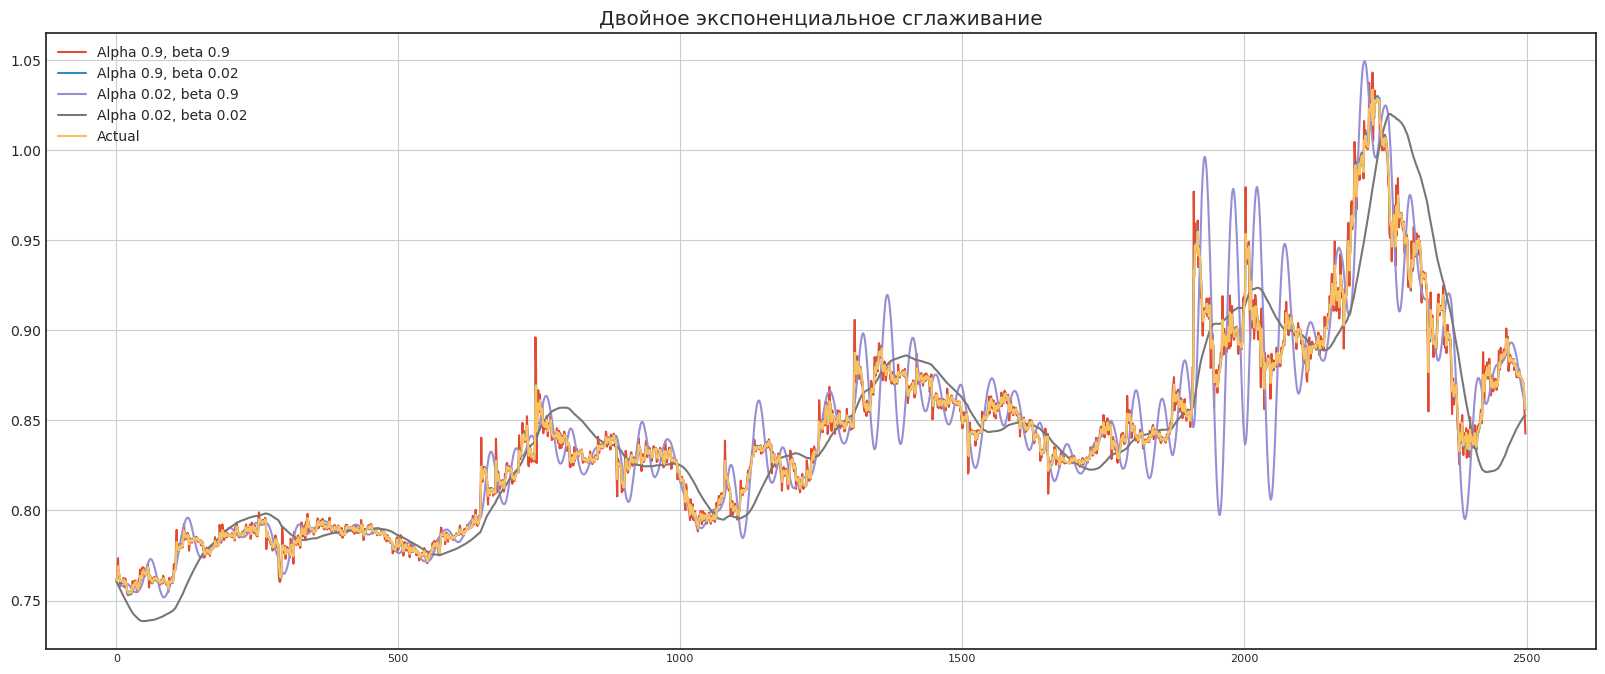

In [46]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(df_train.close, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(df_train.close.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Двойное экспоненциальное сглаживание")
    plt.grid(True)

Теперь настраивать пришлось уже два параметра — $\alpha$ и $\beta$. 

Первый отвечает за сглаживание ряда вокруг тренда, второй — за сглаживание самого тренда. Чем выше значения, тем больший вес будет отдаваться последним наблюдениям и тем менее сглаженным окажется модельный ряд. Комбинации параметров могут выдавать достаточно причудливые результаты, особенно если задавать их руками. не ручной, автоматизированный подбор параметров будет показан чуть ниже, сразу после тройного экспоненциального сглаживания.

### 3.4. Тройное экспоненциальное сглаживание Holt-Winters

Итак, успешно добрались до следующего варианта экспоненциального сглаживания, на сей раз тройного.


Идея этого метода заключается в добавлении еще одной, третьей, компоненты — сезонности. Соответственно, метод применим только в случае, если ряд этой сезонностью не обделён, что в нашем случае верно. Сезонная компонента в модели будет объяснять повторяющиеся колебания вокруг уровня и тренда, а характеризоваться она будет длиной сезона — периодом, после которого начинаются повторения колебаний. Для каждого наблюдения в сезоне формируется своя компонента, например, если длина сезона составляет 7 (например, недельная сезонность), то получим 7 сезонных компонент, по штуке на каждый из дней недели.

Получаем новую систему:

$l_{x} = α * (y_{x} - s_{x-L}) + (1 - α) * (l_{x-1} + b_{x-1})$

$b_{x} = β * (l_{x} - l_{x-1}) + (1 - β) * b_{x-1}$

$s_{x} = ϓ * (y_{x} - l_{x}) + (1 - ϓ) * s_{x-L}$

$ȳ_{x + m} = l_{x} + m * b_{x} + s_{x-L+1+(m-1)modL}$

Уровень теперь зависит от текущего значения ряда за вычетом соответствующей сезонной компоненты, тренд остаётся без изменений, а сезонная компонента зависит от текущего значения ряда за вычетом уровня и от предыдущего значения компоненты. При этом компоненты сглаживаются через все доступные сезоны, например, если это компонента, отвечающая за понедельник, то и усредняться она будет только с другими понедельниками.

Теперь, имея сезонную компоненту, мы можем предсказывать уже не на один, и даже не на два, а на произвольные $m$ шагов вперёд, что не может не радовать.


Ниже приведен код для построения модели тройного экспоненциального сглаживания, также известного по фамилиям её создателей — Чарльза Хольта и его студента Питера Винтерса. Дополнительно в модель включен метод Брутлага для построения доверительных интервалов:

$ȳ_{max_{x}} = l_{x-1} + b_{x-1} + s_{x-T} + m * d_{t-T}$

$ȳ_{min_{x}} = l_{x-1} + b_{x-1} + s_{x-T} + m * d_{t-T}$

$d_{t} = ϓ | y{t} - ȳ_{t} | + (1 - ϓ) * d_{t-T}$ 

где $T$ — длина сезона, $d$ — предсказанное отклонение, а остальные параметры берутся из тройного сглаживани.

In [47]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

### 3.5. Кросс-валидация на временных рядах

Перед тем, как построить модель, поговорим, наконец, о не ручной оценке параметров для моделей.


Ничего необычного здесь нет, по-прежнему сначала необходимо выбрать подходящуюю для данной задачи функцию потерь: RMSE, MAE, MAPE и др., которая будет следить за качеством подгонки модели под исходные данные. Затем будем оценивать на кросс-валидации значение функции потерь при данных параметрах модели, искать градиент, менять в соответствии с ним параметры и бодро опускаться в сторону глобального минимума ошибки.


Небольшая загвоздка возникает только в кросс-валидации. Проблема состоит в том, что временной ряд имеет, как ни парадоксально, временную структуру, и случайно перемешивать в фолдах значения всего ряда без сохранения этой структуры нельзя, иначе в процессе потеряются все взаимосвязи наблюдений друг с другом. Поэтому придется использовать чуть более хитрый способ для оптимизации параметров на "cross-validation on a rolling basis" или на кросс-валидации на скользящем окне.

Суть достаточно проста — начинаем обучать модель на небольшом отрезке временного ряда, от начала до некоторого $t$, делаем прогноз на $t+n$ шагов вперед и считаем ошибку. Далее расширяем обучающую выборку до $t+n$ значения и прогнозируем с $t+n$ до $t+2*n$, так продолжаем двигать тестовый отрезок ряда до тех пор, пока не упрёмся в последнее доступное наблюдение. В итоге получим столько фолдов, сколько $n$ уместится в промежуток между изначальным обучающим отрезком и всей длиной ряда.

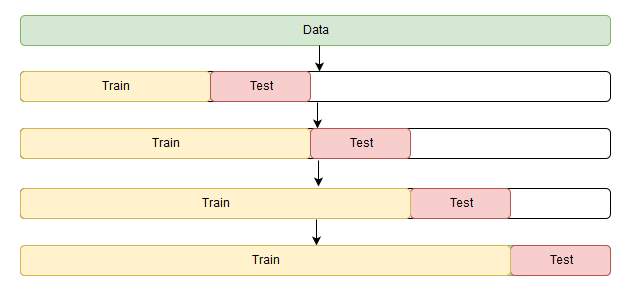

In [48]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mse(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

Значение длины сезона 24 возникло не случайно — в исходном ряде отчетливо видна дневная сезонность, (отсюда 24), и недельная — по будням ниже, на выходных — ее вовсе нет. Но число 7 я умышленно убрал из сезонности, иначе вычислительные мощности ПК банально зависали. Суммарно хотелось получить сезонный компонент равный 24*7.


В модели Хольта-Винтерса, как и в остальных моделях экспоненциального сглаживания, есть ограничение на величину сглаживающих параметров — каждый из них может принимать значения от 0 до 1, поэтому для минимизации функции потерь нужно выбирать алгоритм, поддерживающий ограничения на параметры, в данном случае — Truncated Newton conjugate gradient.

In [49]:
%%time
data = df_train.close[:-500] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.006408358229820665 0.0017113056214728695 0.0006097931750388974
CPU times: total: 8.52 s
Wall time: 8.59 s


Передадим полученные оптимальные значения коэффициентов $\alpha$, $\beta$ и $\gamma$ и построим прогноз на 5 дней вперёд (128 часов)

In [50]:
# Передаем оптимальные значения модели, 
data = df_train.close
model = HoltWinters(data[:-128], slen = 24, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

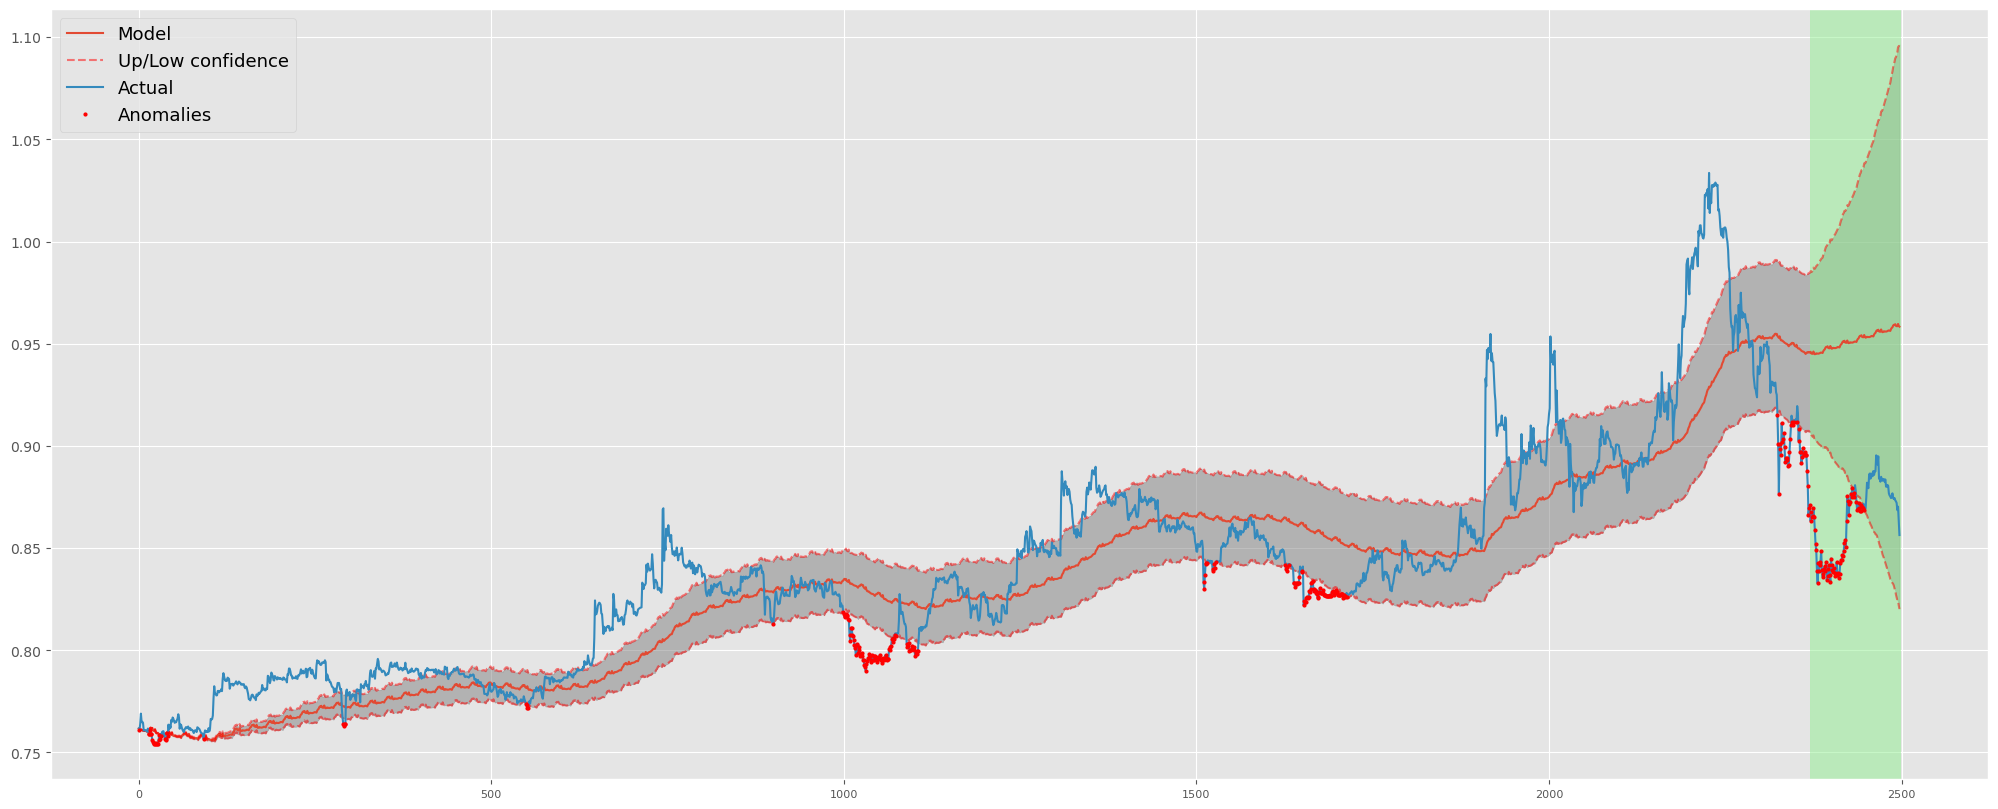

In [51]:
def plotHoltWinters():
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=2, label = "Anomalies", color='red')
    plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgreen')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()

Судя по графику, модель неплохо описала исходный временной ряд, уловив часовую и даже недельную сезонность, и смогла поймать аномальные снижения, вышедшие за пределы доверительных интервалов. Если посмотреть на смоделированное отклонение, хорошо видно, что модель достаточно резко регирует на значительные изменения в структуре ряда, но при этом быстро возвращает дисперсию к обычным значениям, "забывая" прошлое. Такая особенность позволяет неплохо и без значительных затрат на подготовку-обучение модели настроить систему по детектированию аномалий даже в достаточно шумных рядах.

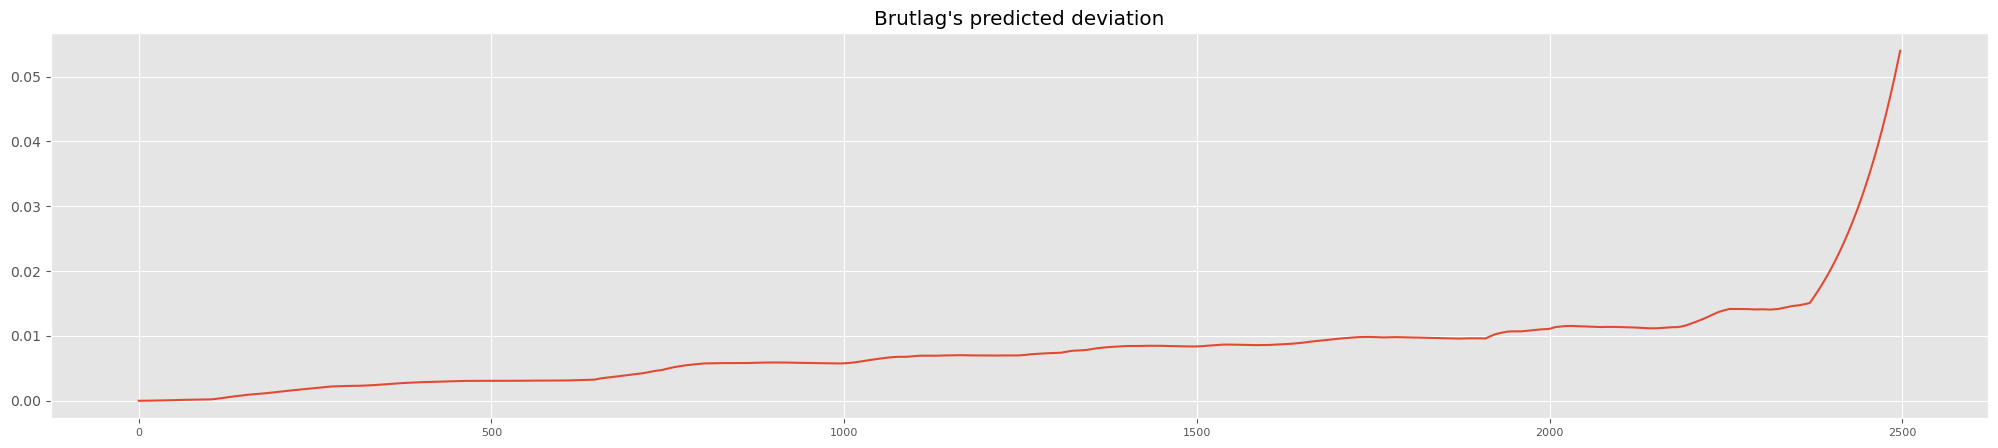

In [52]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

### 3.6. Избавление от нестационарности и построение SARIMA

Для построение ARIMA модели по инструменту РусГидро попробуем пройти все стадии приведения ряда к стационарному виду.

Критерий Дики-Фуллера: p=0.260569


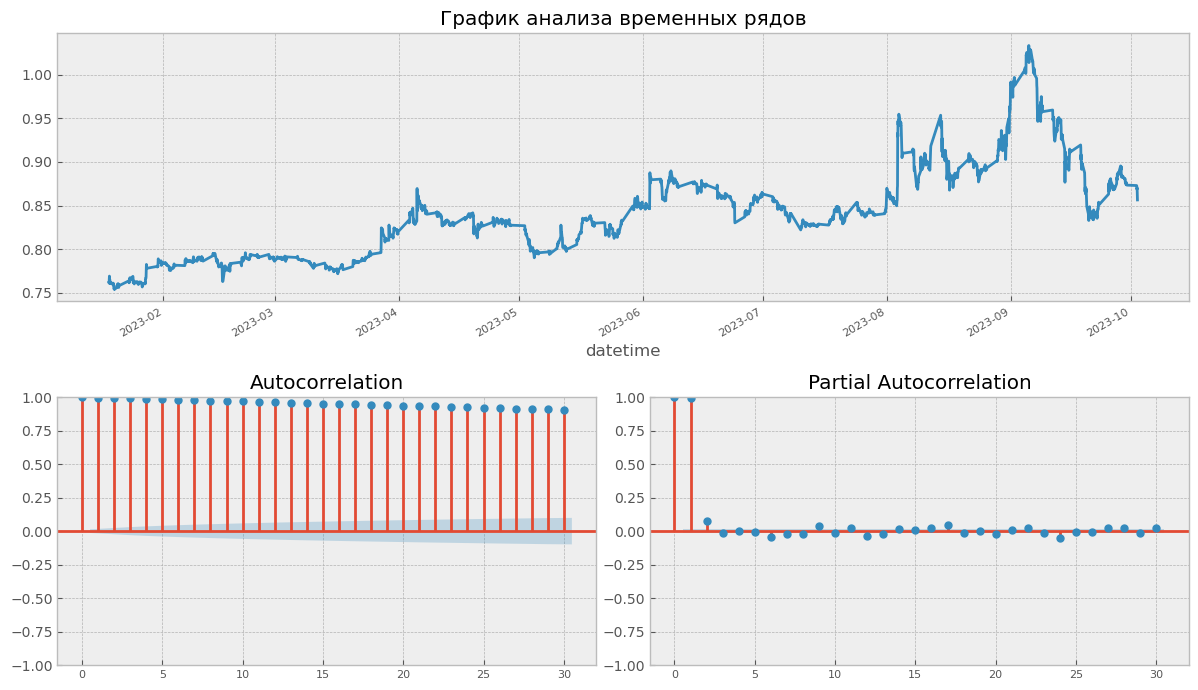

In [53]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('График анализа временных рядов')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df_train.close, lags=30)

Как и следовало ожидать, исходный ряд стационарным не является, критерий Дики-Фуллера не отверг нулевую гипотезу о наличии единичного корня то есть ряд нестационарный (p-Value > 0,05). Попробуем стабилизировать дисперсию преоразованием Бокса-Кокса.

Критерий Дики-Фуллера: p=0.260569
Оптимальный параметр преобразования Бокса-Кокса: -10.273946


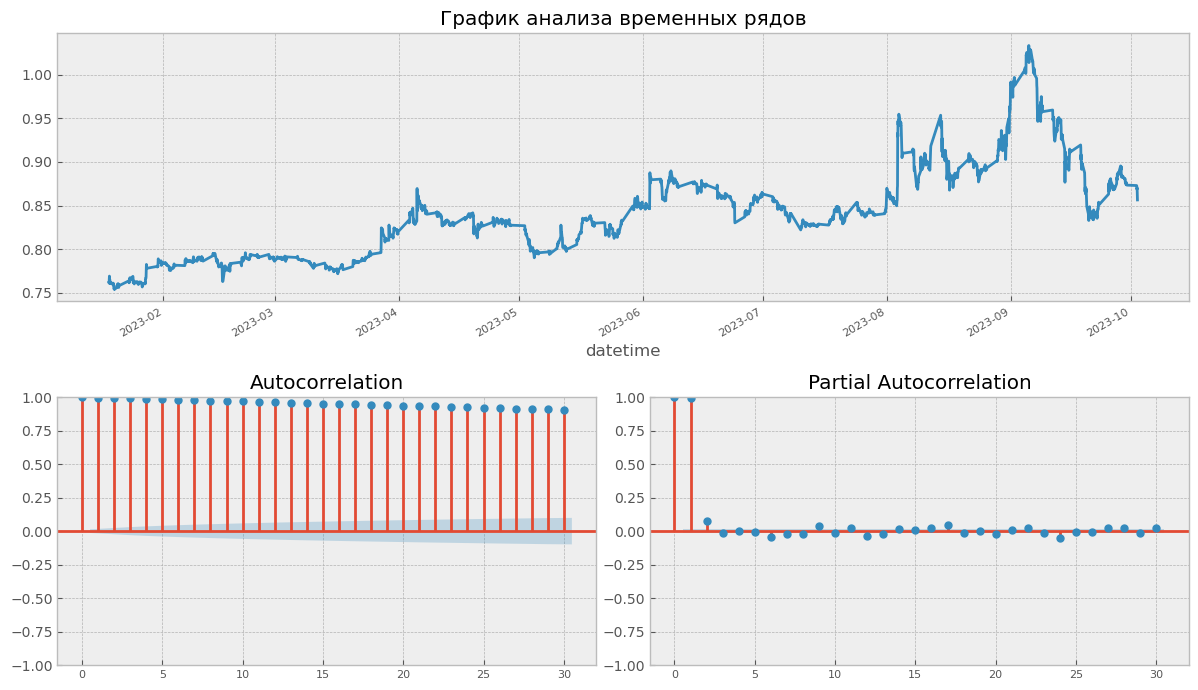

In [54]:
def invboxcox(y,lmbda):
    # обратное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

data = df_train.copy()
data['close_box'], lmbda = scs.boxcox(data.close+1) # прибавляем единицу, так как в исходном ряде есть нули
tsplot(data.close, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

Критерий Дики-Фуллера по-прежнему не отвергает гипотезу о нестационарности ряда.<br>
Автокорреляция позволяет выявлять тренд и сезонность, а также используется при подборе параметров моделей.<br>

То, что корреляция на графике Autocorrelation постоянно положительная, говорит о наличии тренда. Все это согласуется с тем, что мы узнали о данных, когда раскладывали их на компоненты. Также замечу, что синяя граница позволяет оценить статистическую значимость корреляции. Если столбец выходит за ее пределы, то автокорреляция достаточно сильна и ее можно использовать при построении модели.

Возьмём сезонные разности:

Критерий Дики-Фуллера: p=0.000000


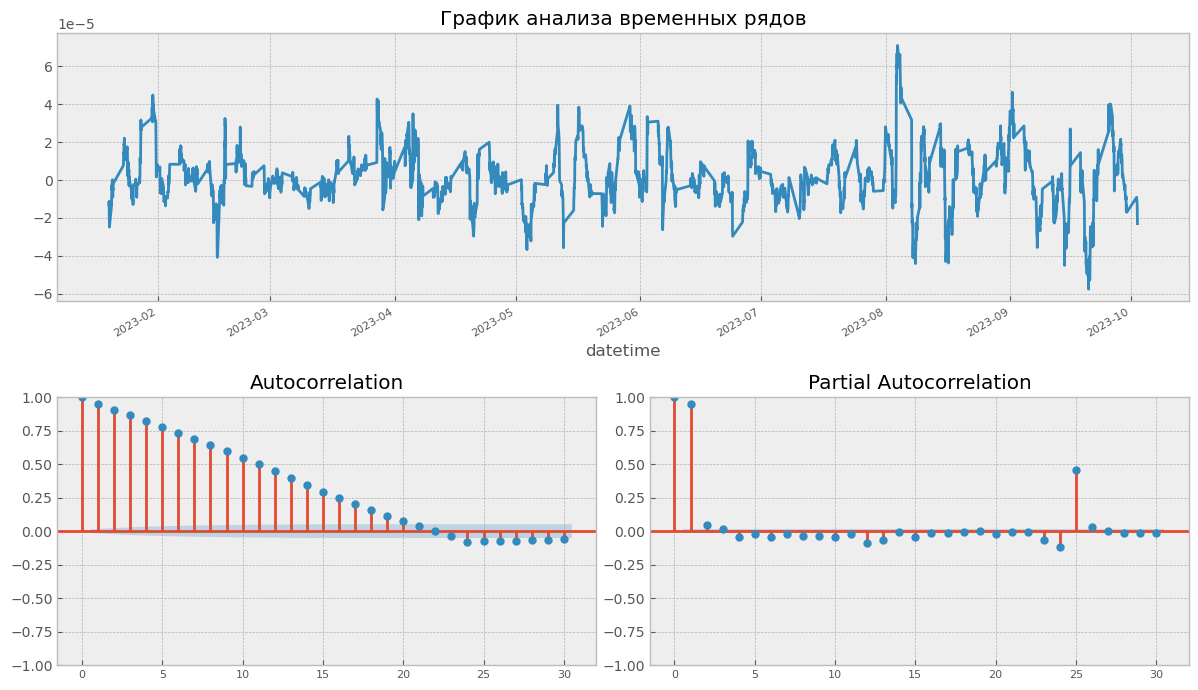

In [55]:
data['close_box_season'] = data.close_box - data.close_box.shift(24)
tsplot(data.close_box_season[24:], lags=30)

Критерий Дики-Фуллера теперь отвергает нулевую гипотезу о нестационарности, но автокорреляционная функция всё ещё выглядит нехорошо из-за большого числа значимых лагов. Так как на графике частной автокорреляционной функции значим лишь один лаг, стоит взять еще первые разности, чтобы привести наконец ряд к стационарному виду.

Критерий Дики-Фуллера: p=0.000000


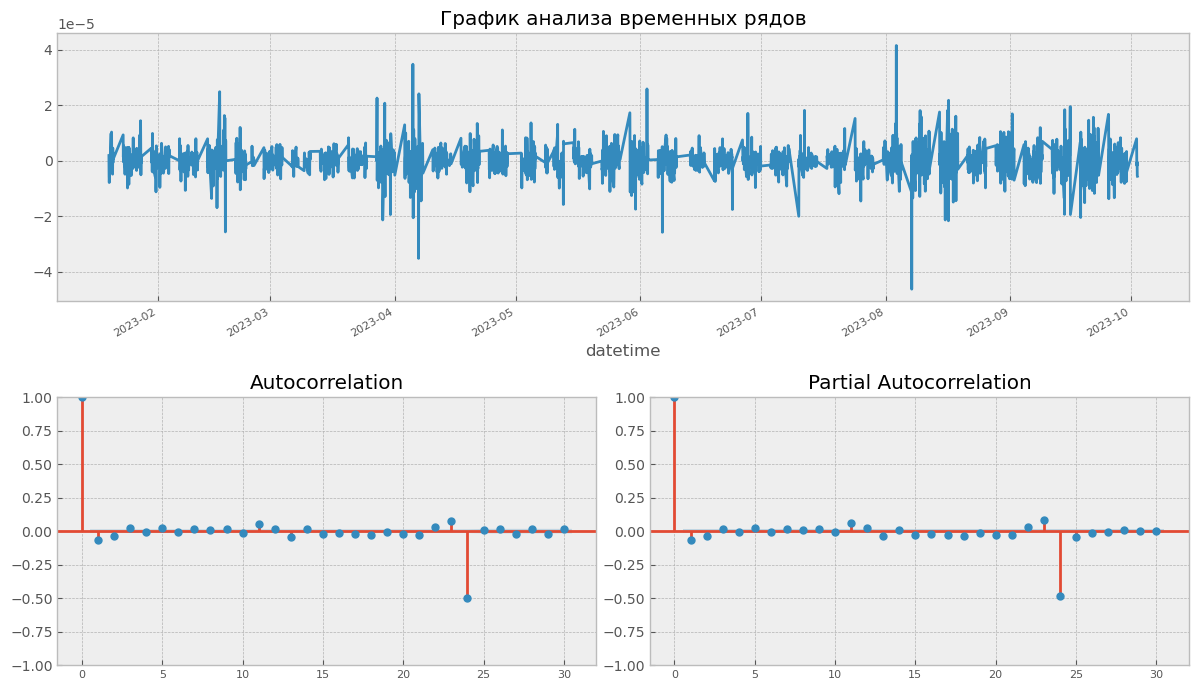

In [56]:
data['close_box_season_diff'] = data.close_box_season - data.close_box_season.shift(1)
tsplot(data.close_box_season_diff[24+1:], lags=30)

### 3.7. Построение модели SARIMA

Наконец, получив стационарный ряд, теперь по автокорреляционной и частной автокорреляционной функциям прикинем параметры для SARIMA модели, на забыв, что предварительно уже сделали первые и сезонные разности.

Итак, предварительный анализ закончен, и мы можем перейти к построению сезонной модели ARIMA (SARIMA).

Общий вид данной модели 
$ARIMA(p,d,q)(P,D,Q)_s$

В этой модели параметры обозначают следующее:<br>

$p$ — порядок модели авторегрессии $AR(p)$<br>
$d$ — порядок интегрирования исходных данных<br>
$q$ — порядок модели скользящей средней $MA(q)$<br>
$P$ — порядок сезонной составляющей $SAR(P)$<br>
$D$ — порядок интегрирования сезонной составляющей<br>
$Q$ — порядок сезонной составляющей $SMA(Q)$<br>
$s$ — размерность сезонности(месяц, квартал и т.д.)<br>


В модели ARIMA мы должны учитывать три значения, которые нам также необходимо указать в наших параметрах при ее реализации. Следовательно, мы можем представить его как (p, d, q).

P = лаги в авторегрессионной модели.<br>
D = порядок дифференцирования/интегрирования.<br>
Q = запаздывание скользящего среднего.<br>

Начальные приближения приблизительно следующие: Q = 1, P = 4, q = 3, p = 2

In [57]:
ps = range(0, 5)
d=1
qs = range(0, 4)
Ps = range(0, 5)
D=1
Qs = range(0, 1)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

Ниже предполагалось подобрать гиперпараметры для SARIMAX вручную, но это процесс не только затратный по времени, но и приводит к жесткому ауту ПК. Воспользуемся автоматическим подбором параметров модели ARIMA при помощи функции auto_arima.

In [58]:
# %%time
# results = []
# best_aic = float("inf")

# for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
#     try:
#         model=sm.tsa.statespace.SARIMAX(data.close_box, order=(param[0], d, param[1]), 
#                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
#     except ValueError:
#         print('wrong parameters:', param)
#         continue
#     aic = model.aic
    #сохраняем лучшую модель, aic, параметры
#     if aic < best_aic:
#         best_model = model
#         best_aic = aic
#         best_param = param
#     results.append([param, model.aic])

# warnings.filterwarnings('default')

# result_table = pd.DataFrame(results)
# result_table.columns = ['parameters', 'aic']
# print(result_table.sort_values(by = 'aic', ascending=True).head())

In [59]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(data.close_box, start_p = 1, start_q = 1, max_p = 4, max_q = 3, m = 24, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)
  
# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=-7819.424, Time=21.71 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-47808.343, Time=3.83 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-51521.823, Time=36.93 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-47748.410, Time=98.44 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-47790.348, Time=0.83 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-51805.044, Time=5.04 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=-51822.785, Time=15.36 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=-51820.735, Time=18.68 sec
 ARIMA(1,0,0)(0,1,2)[24] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,1,2)[24] intercept   : AIC=2265288.970, Time=45.69 sec
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=-47818.877, Time=12.02 sec
 ARIMA(2,0,0)(0,1,1)[24] intercept   : AIC=-51822.008, Time=18.80 sec
 ARIMA(2,0,1)(0,1,1)[24] intercept   : AIC=-51948.619, Time=73.33 sec
 ARIMA(2,0,1)(0,1,0)[24] intercept   : AIC=-51968.922, Time

Лучшие параметры загоняем в модель:

In [60]:
%%time
best_model = sm.tsa.statespace.SARIMAX(data.close_box, order=(3,0,1), 
                                        seasonal_order=(0,1,0,24)).fit(disp=-1)

print(best_model.summary())  

                                      SARIMAX Results                                      
Dep. Variable:                           close_box   No. Observations:                 2498
Model:             SARIMAX(3, 0, 1)x(0, 1, [], 24)   Log Likelihood               25659.901
Date:                             Sat, 18 Nov 2023   AIC                         -51309.803
Time:                                     11:49:23   BIC                         -51280.735
Sample:                                          0   HQIC                        -51299.244
                                            - 2498                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5961   2.61e-20   2.28e+19      0.000       0.596       0.596
ar.L2          0.3108    2.

Проверим остатки модели:

Критерий Дики-Фуллера: p=0.000000


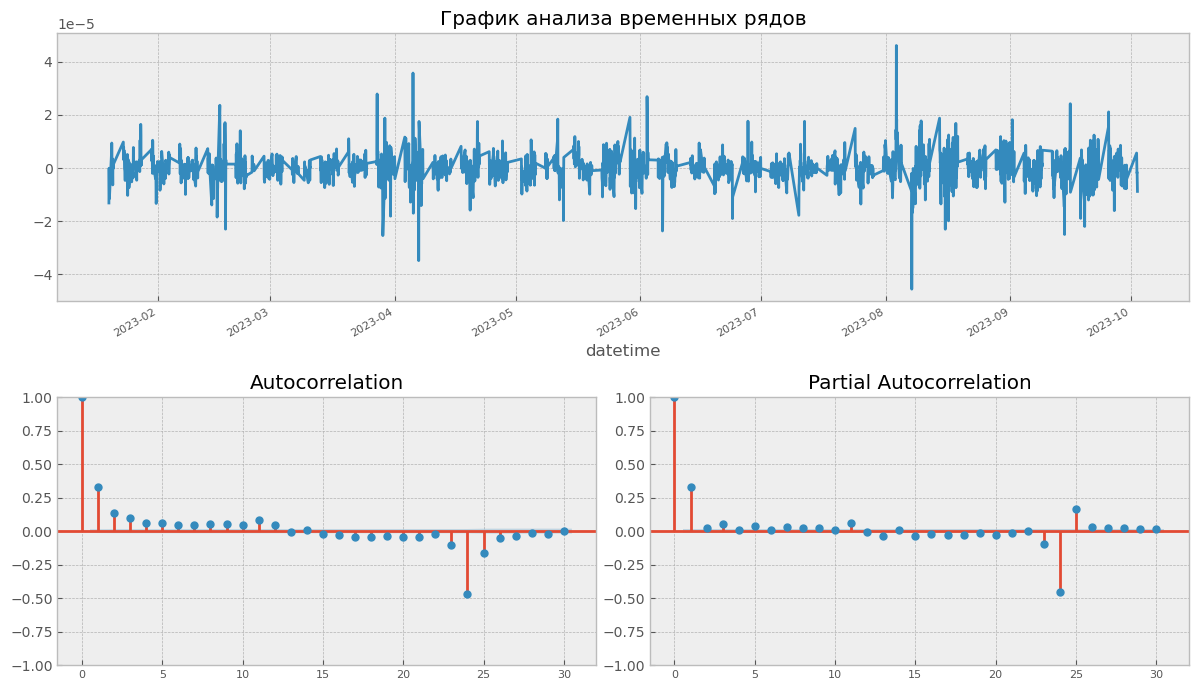

In [61]:
tsplot(best_model.resid[24:], lags=30)

Что ж, остатки стационарны, явных автокорреляций нет, построим прогноз по получившейся модели

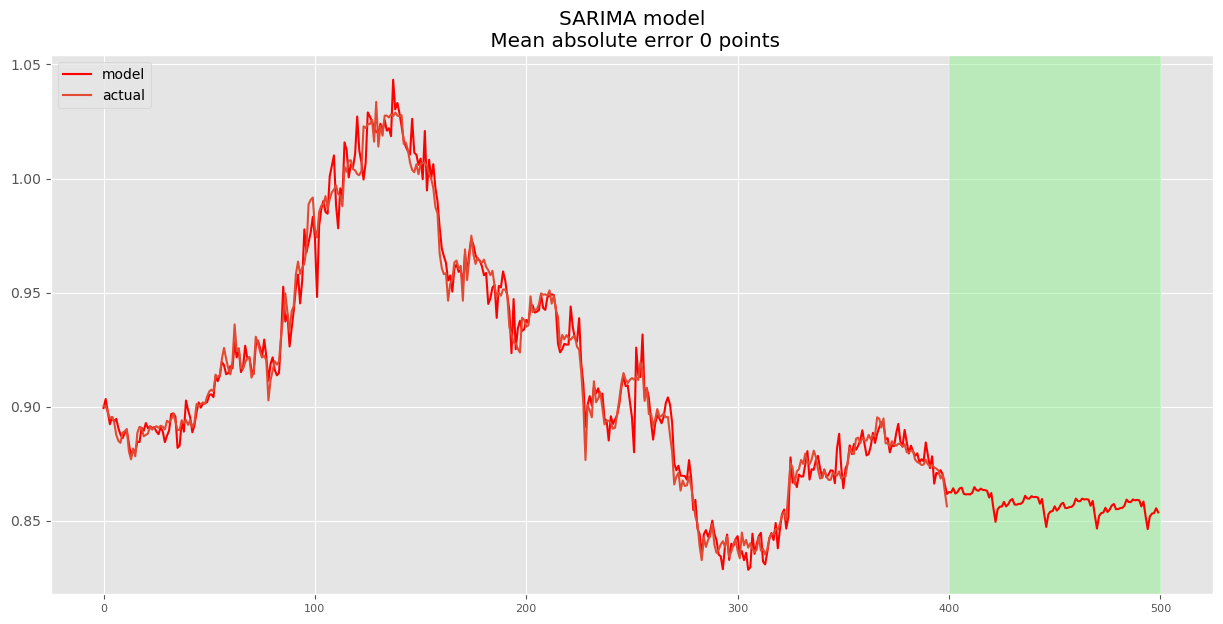

In [62]:
data["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)-1
forecast = invboxcox(best_model.predict(start = data.shape[0], end = data.shape[0]+100), lmbda)-1
forecast = data.arima_model.append(forecast).values[-500:]
actual = data.close.values[-400:]
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.title("SARIMA model\n Mean absolute error {} points".format(round(mse(data.dropna().close, data.dropna().arima_model))))
plt.plot(actual, label="actual")
plt.legend()
plt.axvspan(len(actual), len(forecast), alpha=0.5, color='lightgreen')
plt.grid(True)

Модель SARIMAX безусловно отличный вариант для построения моделей прогнозирования временных рядов с учетом тренда и сезонности. Но есть у нее существенный минус - это очень долгое обучение и подбор параметров, а также нагрузка на вычислительные процессы ПЭВМ или сервера. 

Best model:  ARIMA(3,0,1)(0,1,0)[24]<br>
Total fit time: 729.744 seconds

Для бизнеса нужно зачастую двольно быстрое решение, даже с небольшим ущербом по качеству. 

### 3.8. Линейные модели на временных рядах

Часто на работе приходится строить модели, руководствуясь одним основополагающим принципом – быстро, качественно, недорого. Поэтому часть моделей могут банально не подойти для "продакшн-решений", так как либо требуют слишком больших затрат по подготовке данных (например, SARIMA), либо сложно настраиваются (хороший пример – SARIMA), либо требуют частого переобучения на новых данных (опять SARIMA), поэтому зачастую гораздо проще бывает выделить несколько признаков из имеющегося временного ряда и построить по ним обычную линейную регрессию или навесить решаюший лес. Дешево и сердито.

*Извлечение признаков (Feature extraction)*

Помимо стандартных признаков вроде лагов целевой переменной, много информации содержат в себе дата и время. 

Есть еще один вариант кодирования категориальных признаков – кодирование средним. Если не хочется раздувать датасет множеством дамми-переменных, которые могут привести к потере информации о расстоянии, а в вещественном виде возникают противоречивые результаты а-ля "0 часов < 23 часа", то можно закодировать переменную чуть более интерпретируемыми значениями. 

Естественный вариант – закодировать средним значением целевой переменной. В нашем случае каждый день недели или час дня можно закодировать сооветствующим средним числом цены закрытия, находившихся в этот день недели или час онлайн. При этом важно следить за тем, чтобы расчет среднего значения производился только в рамках тестового датасета (или в рамках текущего наблюдаемого фолда при кросс-валидации), иначе можно ненароком привнести в модель информацию о будущем.

In [63]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

Создадим новый датафрейм и добавим в него час, день недели и выходной в качестве категориальных переменных. Для этого переводим имеющийся в датафрейме индекс в формат datetime, и извлекаем из него hour и weekday.

In [64]:
#Создаем копию датафрейма из тренировочной выборки
data = df_train.copy()
data.columns = ["y"]

#data.index = data.index.to_datetime()
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.head()

y  hour  weekday  is_weekend
datetime                                              
2023-01-18 10:00:00  0.7617    10        2           0
2023-01-18 11:00:00  0.7609    11        2           0
2023-01-18 12:00:00  0.7640    12        2           0
2023-01-18 13:00:00  0.7690    13        2           0
2023-01-18 14:00:00  0.7648    14        2           0

Посмотрим на средние по дням недели

In [65]:
code_mean(data, 'weekday', "y")

{0: 0.8432390041493776,
 1: 0.8423973469387755,
 2: 0.8395648809523809,
 3: 0.8389337301587302,
 4: 0.8394673745173745}

Помимо перечисленных преобразований для увеличения числа признаков используют и множество других метрик, например, максимальное/минимальное значение, наблюдавшееся в скользящем по ряду окне, медианы, число пиков, взвешенные дисперсии и многое другое. 


Для удобства все преобразования можно записать в одну функцию, которая сразу же будет возвращать разбитые на трейн и тест датасеты и целевые переменные.

In [66]:
def prepareData(data, lag_start, lag_end, test_size):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    #data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    

    # разбиваем весь датасет на тренировочную и тестовую выборку
    # Разделение на тренировочную и валидационную выборки
    train, test = train_test_split(data, shuffle=False, test_size=test_size)
    print(
    f'Получились выборки в следующих пропорциях:\n'
    f'{(len(train)/len(data)):.0%} — тренировочная, размер: {train.shape};\n'
    f'{(len(test)/len(data)):.0%} — валидационная, размер: {test.shape}.'
    )        
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(train))

    # считаем средние только по тренировочной части, чтобы избежать лика
    #data['weekday_average'] = map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday)
    #data["hour_average"] = map(code_mean(data[:test_index], 'hour', "y").get, data.hour)
    
    data['weekday_average'] = data[:test_index].groupby("weekday")["y"].transform("mean")
    data["hour_average"] = data[:test_index].groupby("hour")["y"].transform("mean")

    # выкидываем закодированные средними признаки 
    data.drop(["hour", "weekday"], axis=1, inplace=True)

    #data = data.dropna()
    #data = data.reset_index(drop=True)

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    #test_index = int(len(data)*(1-test_size))
    
    train = train.dropna()
    #train = train.reset_index(drop=True)
    
    X_train  = train.drop('y', axis=1)
    y_train = train[['y']]
    X_test = test.drop('y', axis=1)
    y_test = test[['y']]

    return X_train, X_test, y_train, y_test

Обучим на получившихся данных простую линейную регрессию. При этом лаги будем брать начиная с первого до двадцать четвёртого, таким образом модель будет способна строить предсказания на 24 часа вперёд, имея фактические наблюдения за предыдущий день.

Получились выборки в следующих пропорциях:
90% — тренировочная, размер: (2248, 27);
10% — валидационная, размер: (250, 27).
Размерность X_train (2225, 26)
Размерность X_test (250, 26)
Размерность y_train (2225, 1)
Размерность y_test (250, 1)


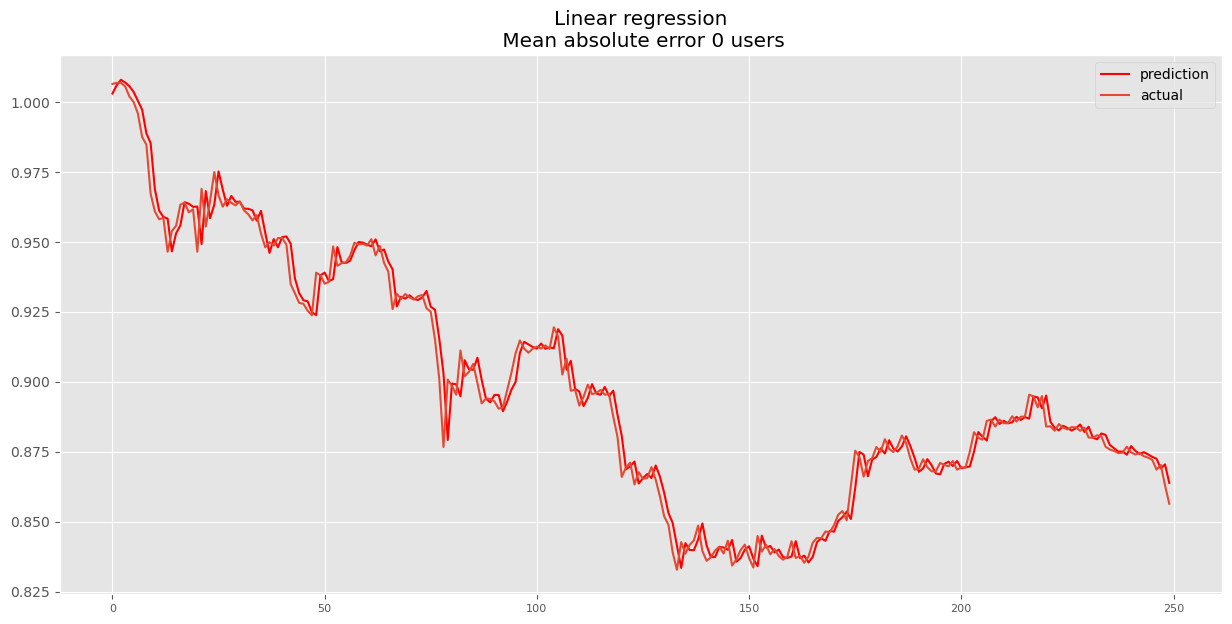

In [67]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(df_train.close, lag_start=1, lag_end=24, test_size=0.1)
print('Размерность X_train', X_train.shape)
print('Размерность X_test',X_test.shape)
print('Размерность y_train',y_train.shape)
print('Размерность y_test',y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

"""
array = prediction
array.tolist()
series = pd.DataFrame(array.tolist(), columns=['name'])
#print('Размерность таблиц предсказаний и факта: ', series['name'].shape == y['close'].shape)
# Построение графика
pd.DataFrame(np.array([series['name'], y_test['y']]).T, 
         columns=['prediction', 'actual'], 
         index=y_test.index).plot(figsize=(20, 5),
         title = 'Проверка предсказаний целей на выборке Train',
         ylabel = 'Цена актива',
         xlabel = 'Тайфрейм')
"""

plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mse(prediction, y_test))))
plt.grid(True);

Получилось достаточно неплохо, при отборе признаков модель незначительно ошибается, и это учитывая такую нестационарность тестового ряда.

Также можно провести оценку модели на кросс-валидации, по ому же принципу, что был использован ранее. Для этого воспользуемся функцией (с небольшими модификациями)

In [68]:
def performTimeSeriesCV(X_train, y_train, number_folds, model, metrics):
    print('Размер выборки train: {}'.format(X_train.shape))

    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print('Размер каждого фолда: {}'.format(k))

    errors = np.zeros(number_folds-1)

    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print('')
        split = float(i-1)/i
        print('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) )

        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print('Размер выборки train + test: {}'.format(X.shape)) # the size of the dataframe is going to be k*i

        index = int(np.floor(X.shape[0] * split))

        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]

        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]

        model.fit(X_trainFolds, y_trainFolds)
        errors[i-2] = metrics(model.predict(X_testFold), y_testFold)

    # the function returns the mean of the errors on the n-1 folds    
    return errors.mean()

In [69]:
%%time
performTimeSeriesCV(X_train, y_train, 5, lr, mse)

Размер выборки train: (2225, 26)
Размер каждого фолда: 445

Splitting the first 2 chunks at 1/2
Размер выборки train + test: (890, 26)

Splitting the first 3 chunks at 2/3
Размер выборки train + test: (1335, 26)

Splitting the first 4 chunks at 3/4
Размер выборки train + test: (1780, 26)

Splitting the first 5 chunks at 4/5
Размер выборки train + test: (2225, 26)
CPU times: total: 281 ms
Wall time: 60.8 ms


0.002388006107349543

## 4. Обучение моделей

### 4.1. Подготовка линейных моделей к обучению и сравнению

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда. С помощью функции prepareData() уже были созданы выборки с дополнительными признаками и лагами для горизонта прогнозирования в несколько шагов.

Специфика вычисления отстающих значений с помощью аргумента max_lag налагает дополнительные пропуски в датасете, которые были предобработаны при подготовке дополнительных признаков. 

In [70]:
checking_dates(X_train)
checking_dates(X_test)

--------- Анализ таблицы ----------
Имя DataFrame: "['X_train']"
Минимальная дата в таблице :  2023-01-19 19:00:00 
Максимальная дата в таблице :  2023-09-06 17:00:00
--------- Анализ таблицы ----------
Имя DataFrame: "['X_test']"
Минимальная дата в таблице :  2023-09-06 18:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00


Данные разбиты корректно: обучающая выборка заканчивается датой и временем, с которой начинается валидационная.

В полученных выборках выделим признаки и целевой признак. На них обучим несколько моделей регрессии временных рядов и сохраним их в соответствующих переменных model. Затем для сравнения напечатаем на экране значения полученных метрик RMSE для обучающей и валидационной выборок. 

In [71]:
features_train  = X_train.copy()
target_train = y_train.copy()
features_valid = X_test.copy()
target_valid = y_test.copy()

Для обучения и выбора лучшей будем использовать несколько моделей регрессии временных рядов:

In [72]:
regressors = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "LGBMRegressor": LGBMRegressor()  
}

print('Выбраны следующие модели:')
print()
for key in regressors:
    print('*', key)

Выбраны следующие модели:

* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit
* LGBMRegressor


In [73]:
# Напишем для моделей функцию rmse
def rmse(y, predictions):
    return mse(y, predictions) ** .5

"""
Вариант использования полностью настраиваемого объекта счетчика из простой функции python 
с использованием make_scorer, который может принимать несколько параметров.
Функцию RMSE, которую мы используем, при greater_is_better=True возвращает оценку (значение по умолчанию) 
или потерю при greater_is_better=False. В случае проигрыша выходные данные функции python 
сбрасываются объектом счетчика в соответствии с соглашением о перекрестной проверке, 
согласно которому счетчики возвращают более высокие значения для лучших моделей.
"""
rmse_score = make_scorer(rmse, greater_is_better=False)

In [74]:
# Сюда будем сохранять лучшие значения для разных моделей
df_models = []
df_models = pd.DataFrame(columns=['run_time', 'rmse_train', 'rmse_valid'])
# RMSE_score train
scores = []
scores = pd.DataFrame(columns=['train_RMSE'])
# RMSE_score back
scores_test = []
scores_test = pd.DataFrame(columns=['valid_RMSE'])

Напишем функцию для обучения модели с подборкой гиперпараметров и перекрестным валидатором временных рядов.

In [75]:
# Применим перекрестный валидатор временных рядов
tscv = TimeSeriesSplit(n_splits=8)

In [76]:
# Функция для обучения модели с подборкой гиперпараметров и таймфрейм-валидацией
def train_model_metriks(model, parameters, X, y, X_valid, y_valid, data_type=''):
    
    # Задание стартового времени
    start_time = time.time()
    
    # Условие выбора вариантов обучения модели
    if model.__class__.__name__ == 'Pipeline':
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        print('Отработано на Pipeline', estimator_name)
    else:
        #Подготовка численных признаков к стандартизации данных
        num_features_train = X.select_dtypes(exclude='object').columns.to_list()
        # создаём скелер
        scaler = StandardScaler()
        # обучаем X_train на численных признаках тренировочной выборки и трансформируем её
        X[num_features_train] = scaler.fit_transform(X[num_features_train])
        #y = scaler.fit_transform(y)    
        # обучаем X_test на численных признаках тренировочной выборки и трансформируем её
        X_valid[num_features_train] = scaler.fit_transform(X_valid[num_features_train])
        #y_valid = scaler.fit_transform(y_valid)    
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        estimator_name = gscv.best_estimator_.__class__.__name__
        print('Отработано с помощью Скелера', estimator_name)
    
    if gscv.best_params_:
        print('\nBest parameters:')
        for param_name, val in gscv.best_params_.items():
            print(f'{param_name}: {val}')

    if estimator_name == 'Pipeline':
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        
    data_type = ' + ' + data_type if data_type else ''
    scores.loc[estimator_name + data_type] = [abs(gscv.best_score_)]
    
    # Предсказания на тренировочной выборке
    y_pred = gscv.predict(X)
    y_pred = y_pred.reshape(y_pred.shape[0],1)
    result_train = rmse(y, y_pred)

    # Предсказания на валидационной выборке    
    y_pred = gscv.predict(X_valid)
    result_test = rmse(y_valid, y_pred)   
    scores_test.loc[estimator_name + data_type] = round(result_test,5)   
    
    # Создание сравнительной таблицы метрик моделей
    row = {'run_time': format(round((time.time() - start_time)/60,3)),
           'rmse_train': round(result_train,5),
           'rmse_valid': round(result_test,5)}
    df_models.loc[estimator_name] = row
    
    # Сохранение обученной модели в переменной estimator_name
    estimator_name = gscv

    return df_models, gscv.best_estimator_

### 4.2. Обучение и визуализация моделей

In [77]:
for key in regressors:
    
    regressor = regressors[key]
    
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
      ])
    
    model = train_model_metriks(model, {}, X_train, y_train, X_test, y_test, 'Pipeline')

Отработано на Pipeline RandomForestRegressor
Отработано на Pipeline DecisionTreeRegressor
Отработано на Pipeline GaussianProcessRegressor
Отработано на Pipeline SVR
Отработано на Pipeline NuSVR
Отработано на Pipeline LinearSVR
Отработано на Pipeline KernelRidge
Отработано на Pipeline LinearRegression
Отработано на Pipeline Ridge
Отработано на Pipeline HuberRegressor
Отработано на Pipeline PassiveAggressiveRegressor
Отработано на Pipeline ARDRegression
Отработано на Pipeline BayesianRidge
Отработано на Pipeline ElasticNet
Отработано на Pipeline OrthogonalMatchingPursuit
Отработано на Pipeline LGBMRegressor


In [78]:
print('Визуализация качества моделей регрессии временных рядов')
df_models.sort_values(by='rmse_valid', ascending=True)

Визуализация качества моделей регрессии временных рядов


run_time  rmse_train  rmse_valid
ARDRegression                 0.001     0.04528     0.06285
HuberRegressor                0.003     0.04490     0.06303
OrthogonalMatchingPursuit     0.001     0.04525     0.06317
Ridge                         0.001     0.04515     0.06325
BayesianRidge                 0.001     0.04513     0.06337
LinearRegression              0.001     0.04514     0.06341
NuSVR                         0.141     0.03972     0.08100
LGBMRegressor                 0.037     0.03430     0.09599
RandomForestRegressor         0.418     0.02895     0.10023
LinearSVR                     0.007     0.07307     0.10189
DecisionTreeRegressor         0.024     0.00000     0.10352
PassiveAggressiveRegressor    0.001     0.16541     0.14391
SVR                           0.001     0.23485     0.17386
ElasticNet                    0.001     0.19197     0.25094
GaussianProcessRegressor      0.031     0.00001     0.60711
KernelRidge                    0.01     0.91382     0.91331

In [79]:
# Функция визуализации модели

'''
   model        модель обучения
   parameters   параметры модели
   X            тренировочная выборка
   y            целевой признак тренировочной выборки
   X_valid      валидационная выборка
   y_valid      целевой признак вадидационной выборки
'''


def train_model(model, parameters, X, y, X_valid, y_valid, data_type=''):
       
    if model.__class__.__name__ == 'Pipeline':
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        print('Отработано на Pipeline')
    else:
        #Подготовка численных признаков к стандартизации данных
        num_features_train = X.select_dtypes(exclude='object').columns.to_list()
        # создаём скелер
        scaler = StandardScaler()
        # обучаем X_train на численных признаках тренировочной выборки и трансформируем её
        X[num_features_train] = scaler.fit_transform(X[num_features_train])
        #y = scaler.fit_transform(y)    
        # обучаем X_test на численных признаках тренировочной выборки и трансформируем её
        X_valid[num_features_train] = scaler.fit_transform(X_valid[num_features_train])
        #y_valid = scaler.fit_transform(y_valid)    
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        print('Отработано с помощью Скелера')
    
    if gscv.best_params_:
        print('\nBest parameters:')
        for param_name, val in gscv.best_params_.items():
            print(f'{param_name}: {val}')
            
    estimator_name = gscv.best_estimator_.__class__.__name__
    
    if estimator_name == 'Pipeline':
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        
    data_type = ' + ' + data_type if data_type else ''
    
    # Строим результаты сравнения истинных значений с предсказанными
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5))
    ax.set_title(estimator_name + data_type)
    y_pred = gscv.predict(X)
    y_pred = y_pred.reshape(y_pred.shape[0],1)
    #Визуализация ошибки прогнозирования регрессионной модели
    PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, ax=ax)
    plt.text(0.2, 0.95, f'Train RMSE: {-gscv.best_score_:.2f}', horizontalalignment='center', verticalalignment='center',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    plt.show
    
    scores.loc[estimator_name + data_type] = [abs(gscv.best_score_)]
    
    array = y_pred
    array.tolist()
    series = pd.DataFrame(array.tolist(), columns=['name'])
    #print('Размерность таблиц предсказаний и факта: ', series['name'].shape == y['close'].shape)
    # Построение графика
    pd.DataFrame(np.array([series['name'], y['y']]).T, 
         columns=['model', 'fact'], 
         index=y.index).plot(figsize=(20, 5),
         title = 'Проверка предсказаний целей на выборке Train',
         ylabel = 'Цена актива',
         xlabel = 'Тайфрейм')
    plt.text(0.5, 0.95, f'Train RMSE: {-gscv.best_score_:.2f}', horizontalalignment='center', verticalalignment='center',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
    plt.legend(loc='upper right')

    # получим предсказания обученной модели на тестовой выборке Test и сравним с целевым показателем 
    y_pred = gscv.predict(X_valid)
    result_test = rmse(y_valid, y_pred)   
    #y_pred = y_pred.reshape(y_pred.shape[0],1)
    array = y_pred
    array.tolist()
    series = pd.DataFrame(array.tolist(), columns=['name']) 
    
    scores_test.loc[estimator_name + data_type] = round(result_test,5)       
    
    pd.DataFrame(np.array([series['name'], y_valid['y']]).T, 
         columns=['model', 'fact'], 
         index=target_valid.index).plot(figsize=(20, 5),
         title = 'Проверка предсказаний целей на выборке Test',
         ylabel = 'Цена актива',
         xlabel = 'Тайфрейм')
    plt.text(0.5, 0.95, f'Test RMSE: {round(result_test,5):.2f}', horizontalalignment='center', verticalalignment='center',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
    plt.legend(loc='upper right')    
    return gscv.best_estimator_

#### 4.2.1.  Модель ARDRegression()

Отработано на Pipeline


'Pipeline'

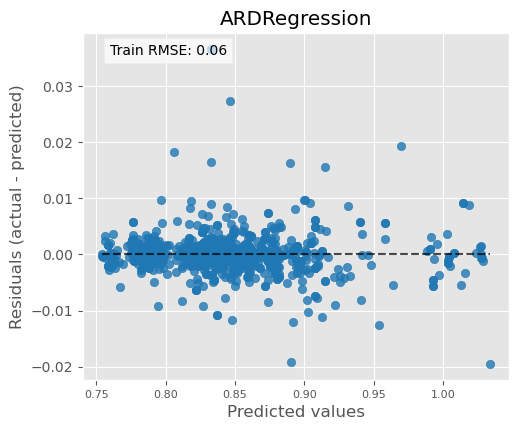

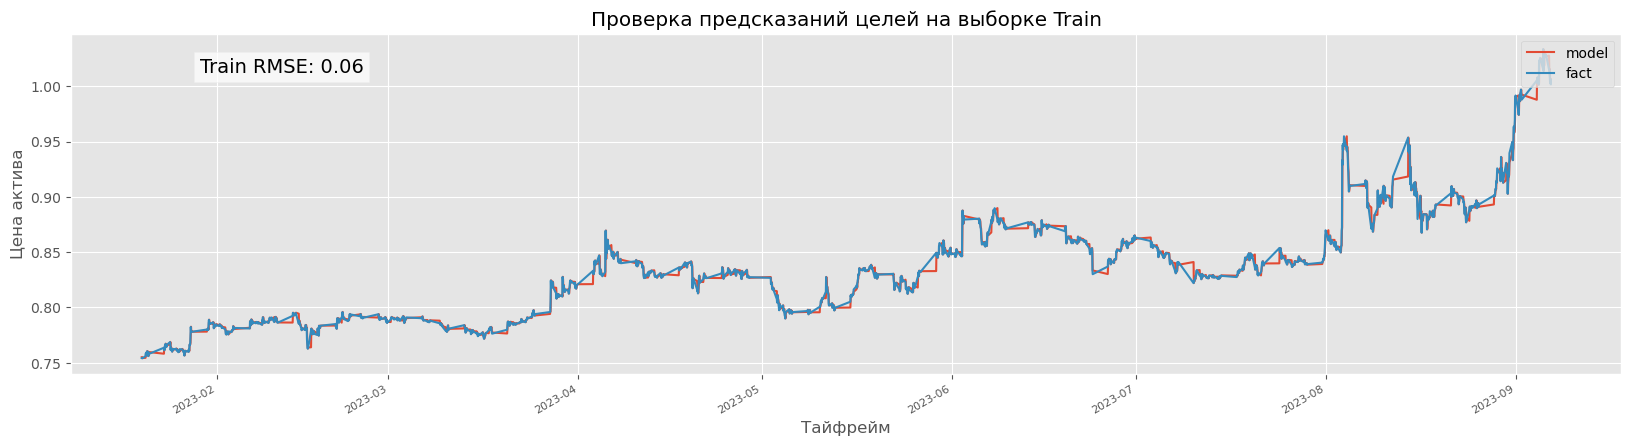

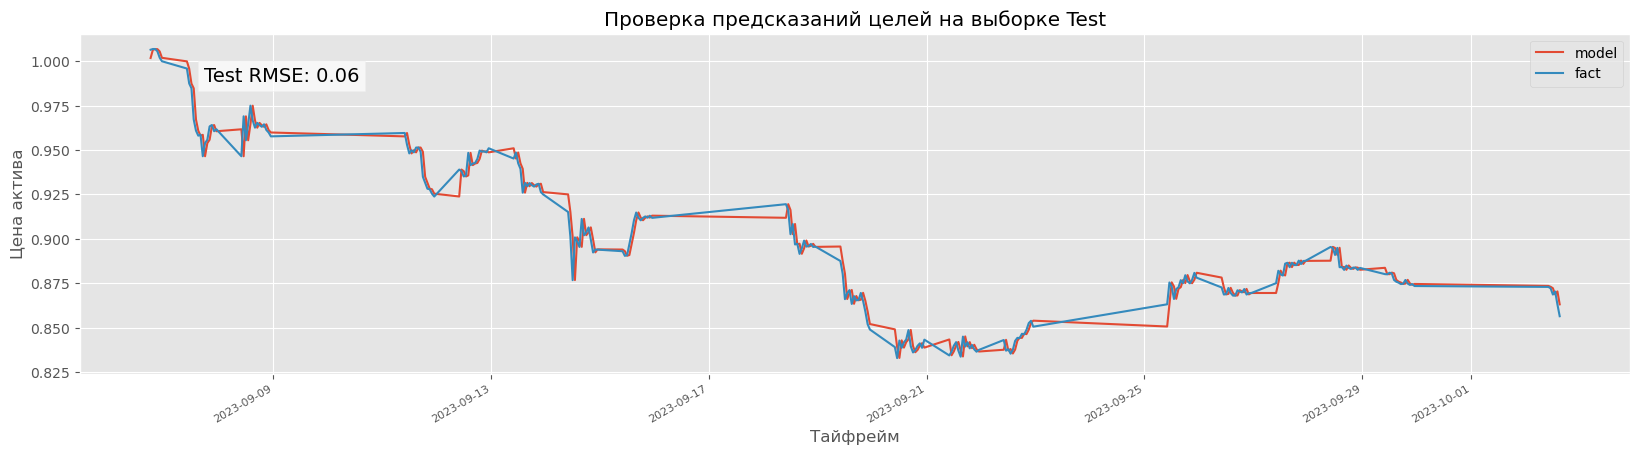

In [80]:
ard_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ARDRegression())
])

ard_reg = train_model(ard_reg, {}, X_train, y_train, X_test, y_test)
ard_reg.__class__.__name__

#### 4.2.2.  Модель HuberRegressor()

Отработано на Pipeline


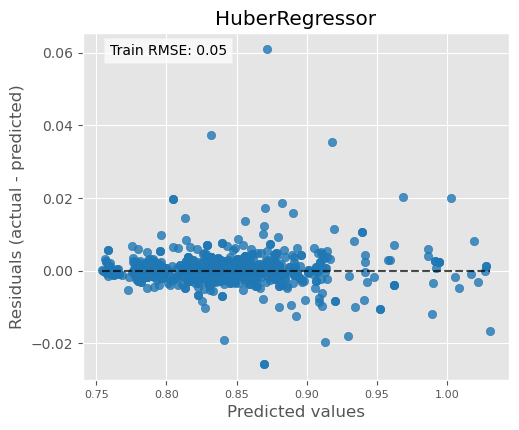

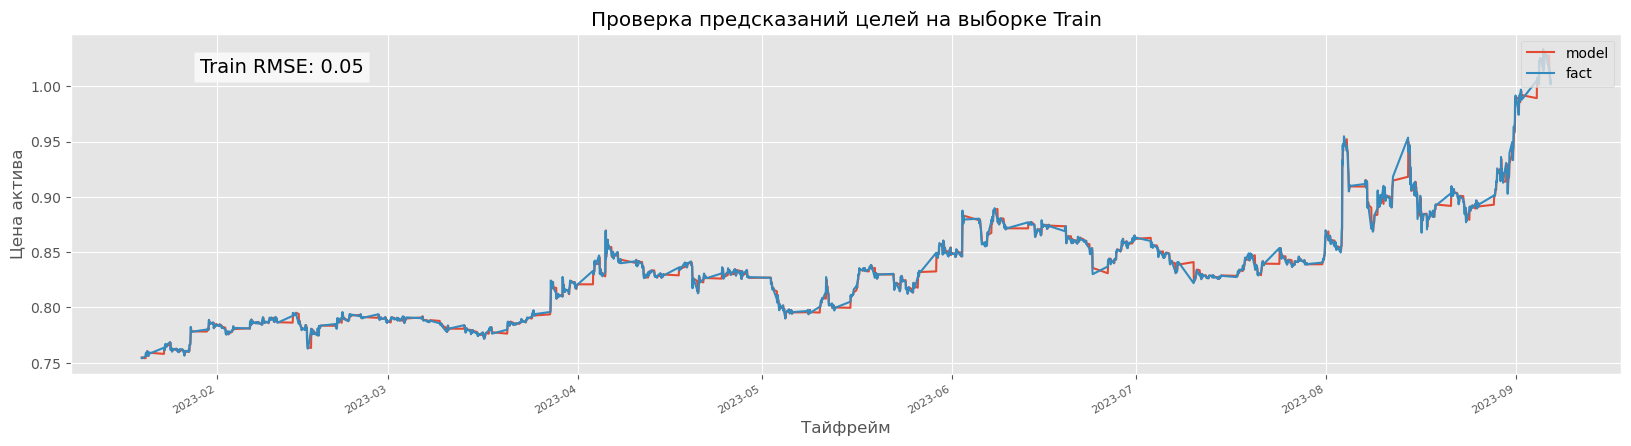

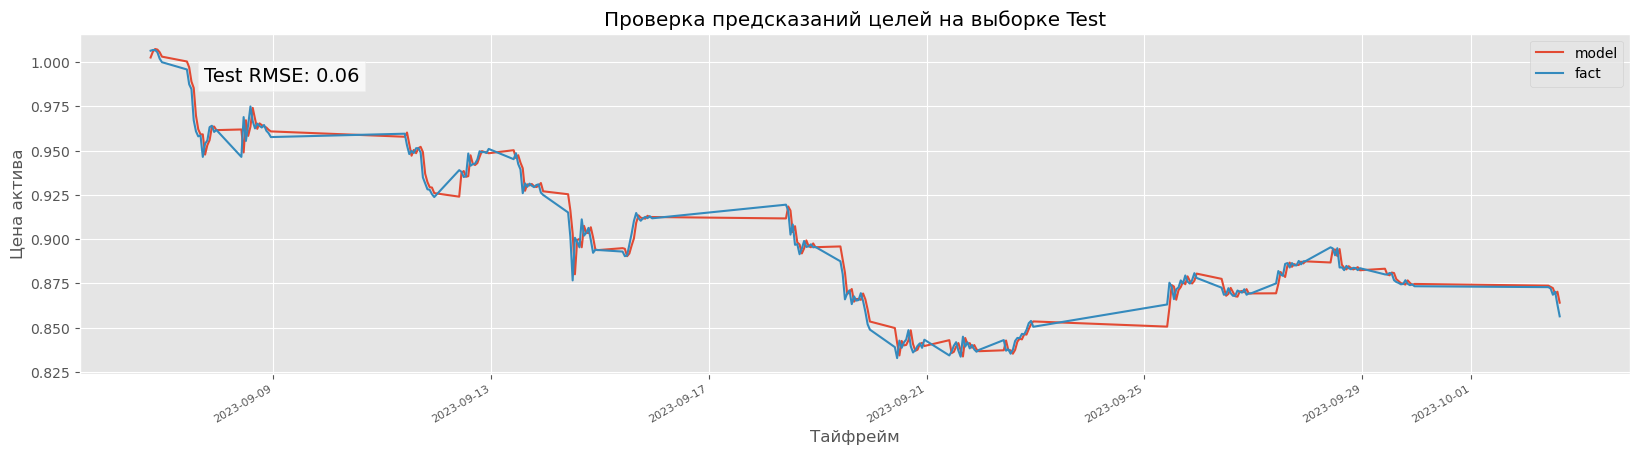

In [81]:
hr_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', HuberRegressor())
])

hr_reg = train_model(hr_reg, {}, X_train, y_train, X_test, y_test)

#### 4.2.3.  Модель OrthogonalMatchingPursuit()

Отработано на Pipeline


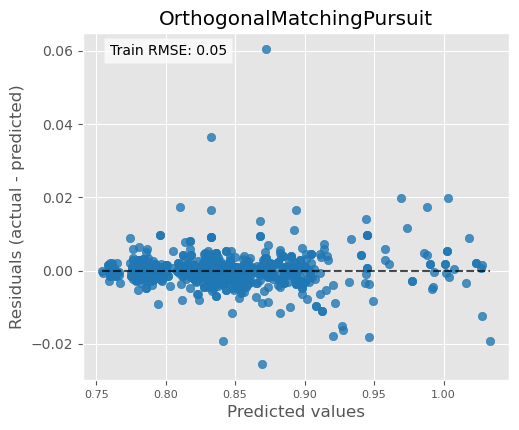

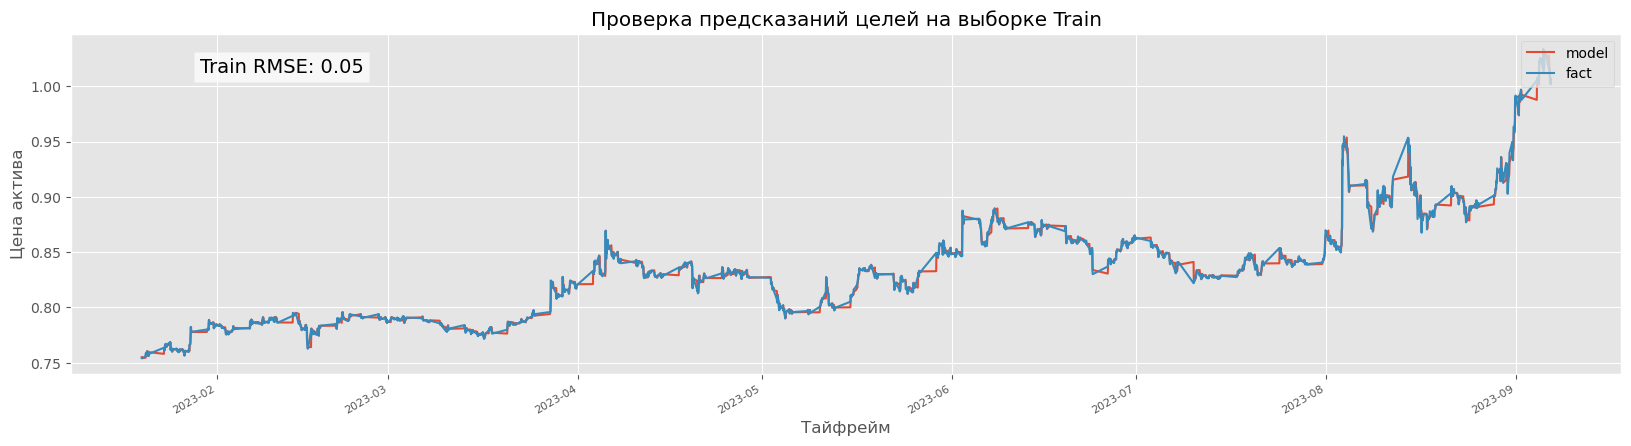

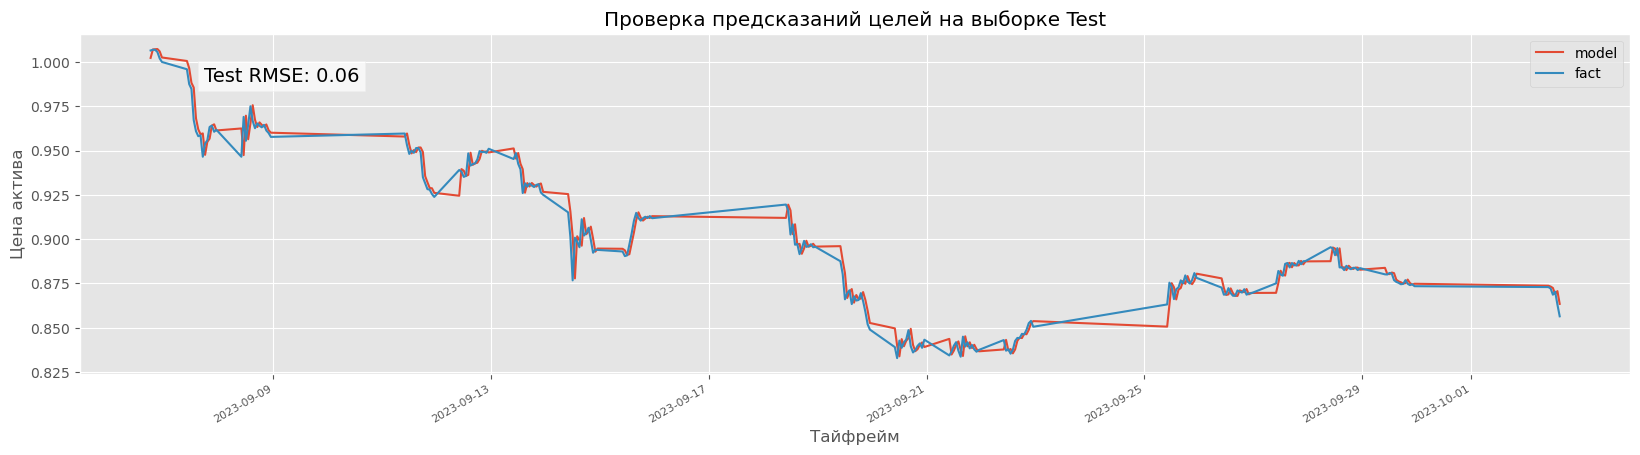

In [82]:
om_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', OrthogonalMatchingPursuit())
])

om_reg = train_model(om_reg, {}, X_train, y_train, X_test, y_test)

### 4.3. Выводы

<div style="border:solid gray 3px; padding: 20px">

Согласно плану проведен следующий этап работ.<br>

1. Cозданы функции обработки данных временных рядов:
- Функция missing_values_table() вычисления пропущенных значений ;
- Функция grafik() визуализации данных для исследования признаков;
- Функция checking_dates() определения крайних значений дат;
- Функция preprocessing_data() предобработки исходного датасета во временной ряд с DatetimeIndex;
- Функция make_features() создания признаков для горизонта прогнозирования временного ряда.

2. На первом этапе загруженный файл BRX.txt был преобразован в DataFrame с временным рядом DatetimeIndex и удалены лишние признаки, которые явно кореллировали с ценами закрытия и средней скользящей. Полученный датасет исходя из условий задачи был разделен на две выброки df_features (для обучения модели и валидации данных) и df_test (для оценки прогноза модели на данной выборке). 

3. Обучаемая выборка df_features была подвержена исследованию на аномалии и качество данных. Бокс-плот "ящик с усами" по ценам закрытия показал, что данные распределены нормально и как таковых выборосов в цене актива не наблюдаются, хотя распределение похоже на ската. Данные вполне приемлемы для обучения и поиска наилучшей модели прогнозирования. 

4. Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда. Поэтому с целью повышения качества прогнозирования будущих значений были созданы дополнительные признаки для горизонта прогнозирования в несколько шагов. Для этого к таблице df_features были добавлены признаки скользящего среднего и вычисленные отстающие значения max_lag, задающие максимальный размер отставания по ценам закрытия 'close'. Исходные константы, такие как max_lag (максимальный размер отставания по кол-ву часов в сутках), mov_average (размер скользящей средней в часах), HOUR (горизонт предсказания в часах) и TIME_LEARN (срез по кол-ву дней для выборки обучения), были определены в начале проекта.
    
Выводы по подбору моделей.<br>

Три модели показали себя наиболее лучшим образом: ARDRegression(), HuberRegressor(), OrthogonalMatchingPursuit(). Судя по метрикам они особо не отличаются друг от друга. На них остановимся для дальнейшего тестирования.

## 5. Тестирование моделей

In [83]:
print('Визуализация качества наилучших моделей регрессии временных рядов')
df_models.sort_values(by='rmse_valid', ascending=True).head(3)

Визуализация качества наилучших моделей регрессии временных рядов


run_time  rmse_train  rmse_valid
ARDRegression                0.001     0.04528     0.06285
HuberRegressor               0.003     0.04490     0.06303
OrthogonalMatchingPursuit    0.001     0.04525     0.06317

### 5.1.  Подготовка выборок для предсказания цен закрытия с горизонтом

In [84]:
# Горизонт прогнозирования в часах вперед
HOUR = 12
# Кол-во строк для прогнозирования
DELTA = 24
# Шаг прогнозирования
frequency = '1h'
# Размер скользящей средней (для дневок - это срез недельный)
mov_average = 24 # почасовой сдвиг (24ч)

In [85]:
# Создаем целевой признак
df_features['y'] = df_features['close']
df_features.drop(['close'], axis=1, inplace=True)

In [86]:
def make_future_data(data, lag_start, lag_end):
    end = data.index.max()

    if end.dayofweek == 0: # понедельник
        if end.hour > 23:  # торги завершаются в 0:00, надо переходить на прогноз следующего дня
            print('Крайняя дата была 22:00 понедельника. Следующие торги начнутся во вторник в 9:00')
            range_data = pd.date_range(start=(data.index.max() + 
                        (pd.to_timedelta(pd.np.ceil(9), unit="h"))),  # прибавляем к последнему времени 9 часов
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        else:
            print('Крайняя дата была до 22:00 понедельника.')
            range_data = pd.date_range(start=(data.index.max()),
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        
    if end.dayofweek == 1: # вторник
        if end.hour > 23:
            print('Крайняя дата была 22:00 вторника. Следующие торги начнутся в среду в 9:00')
            range_data = pd.date_range(start=(data.index.max() + 
                        (pd.to_timedelta(pd.np.ceil(9), unit="h"))),  # прибавляем к последнему времени 9 часов
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        else:
            print('Крайняя дата была до 22:00 вторника.')
            range_data = pd.date_range(start=(data.index.max()),
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        
    if end.dayofweek == 2: # среда
        if end.hour > 22:
            print('Крайняя дата была 22:00 среды. Следующие торги начнутся в четверг в 9:00')
            range_data = pd.date_range(start=(data.index.max() + 
                        (pd.to_timedelta(pd.np.ceil(9), unit="h"))),  # прибавляем к последнему времени 9 часов
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        else:
            print('Крайняя дата была до 22:00 среды.')
            range_data = pd.date_range(start=(data.index.max()),
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        
    if end.dayofweek == 3: # четверг
        if end.hour > 22:
            print('Крайняя дата была 22:00 четверга. Следующие торги начнутся в пятницу в 9:00')
            range_data = pd.date_range(start=(data.index.max() + 
                        (pd.to_timedelta(pd.np.ceil(9), unit="h"))),  # прибавляем к последнему времени 9 часов
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        else:
            print('Крайняя дата была до 22:00 четверга.')
            range_data = pd.date_range(start=(data.index.max()),
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)
        
    if end.dayofweek == 4: # пятница
        if end.hour > 22:
            print('Крайняя дата была 22:00 пятницы. Следующие торги начнутся в понедельник в 9:00')
            # торги завершаются в 0:00 и до понедельника, надо переходить на прогноз следующей недели
            t_start = (data.index.max()+
                 (pd.to_timedelta(pd.np.ceil(57), unit="h"))+
                 (pd.to_timedelta(pd.np.ceil(mov_average), unit="m")))
            range_data = pd.date_range(start=t_start, 
                    end=(t_start+(pd.to_timedelta(pd.np.ceil(HOUR), 
                    unit="h"))), freq = frequency)
        else:
            print('Крайняя дата была до 22:00 пятницы.')
            range_data = pd.date_range(start=(data.index.max()),
                        end=(data.index.max()+(pd.to_timedelta(pd.np.ceil(HOUR), unit="h"))), freq = frequency)

        
    x = pd.DataFrame(range_data, columns =['date'])
    x['y'] = data['y'].values[-1]
    x['datetime'] = pd.to_datetime(x['date'])
    x = x.set_index('datetime')
    x.drop(['date'], axis = 1, inplace = True)
    
    # Склеивание выборки features с таблицей для прогнозов x
    df_future = pd.concat([df_features, x])
    
    df_future = pd.DataFrame(df_future.copy())
    df_future.columns = ["y"]

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        df_future["lag_{}".format(i)] = df_future.y.shift(i)

    #data.index = data.index.to_datetime()
    df_future["hour"] = df_future.index.hour
    df_future["weekday"] = df_future.index.weekday
    df_future['is_weekend'] = df_future.weekday.isin([5,6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    df_future['weekday_average'] = df_future.groupby("weekday")["y"].transform("mean")
    df_future["hour_average"] = df_future.groupby("hour")["y"].transform("mean")

    # выкидываем закодированные средними признаки 
    df_future.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # Сохрание в датасете среза для проверки на df_test
    df_future = df_future.iloc[-(HOUR*2):]
        
    df_future = df_future.dropna()

    return df_future

In [87]:
df_future = make_future_data(df_features, lag_start=1, lag_end=24)

Крайняя дата была до 22:00 понедельника.


Напишем ещё одну функцию формирования датасета для будущего среза предсказаний. Суть функции заключается в том, чтобы к исходной выборке добавить горизонт будущих дат с интервалом 1 час. Для линейных регрессий с лагами - это единственный метод заглянуть в будущее, в отличие от моделей ARIMA.

In [88]:
# Создание таблицы анализируемого среза по df_test
df_after = df_test.copy()
df_after.drop(['volume'], axis= 1 , inplace= True )
df_after.head(1)

open    high     low   close
datetime                                           
2023-10-02 16:00:00  0.8564  0.8566  0.8509  0.8531

Для оценки предсказанных цен закрытия нужно две выборки df_future и df_after выровнять по анализируемому срезу времени

In [89]:
checking_dates(df_future)
print('Всего строк для предсказания получилось: df_future =', df_future.shape[0])

--------- Анализ таблицы ----------
Имя DataFrame: "['df_future']"
Минимальная дата в таблице :  2023-09-29 19:00:00 
Максимальная дата в таблице :  2023-10-03 03:00:00
Всего строк для предсказания получилось: df_future = 24


In [90]:
checking_dates(df_after)
print('Всего строк для предсказания получилось: df_after =', df_after.shape[0])

--------- Анализ таблицы ----------
Имя DataFrame: "['df_after']"
Минимальная дата в таблице :  2023-10-02 16:00:00 
Максимальная дата в таблице :  2023-11-01 16:00:00
Всего строк для предсказания получилось: df_after = 309


In [91]:
df_future = df_after.merge(df_future, how='inner', left_index=True, right_index=True)

In [92]:
checking_dates(df_future)
print('Всего строк для предсказания получилось: dfk =', df_future.shape[0])

--------- Анализ таблицы ----------
Имя DataFrame: "['df_future']"
Минимальная дата в таблице :  2023-10-02 16:00:00 
Максимальная дата в таблице :  2023-10-02 23:00:00
Всего строк для предсказания получилось: dfk = 8


Подготовка тестовой выборки для предсказания анализируемого среза дат

In [93]:
X_future = df_future.copy()
y_future = df_future.copy()
y_fact = df_future.copy()

In [94]:
X_future.drop(['open', 'high', 'low', 'close'], axis = 1, inplace = True)
# Создаем целевой признак y_future
y_future = y_future[['y']]
#y_future.drop(['y'], axis = 1, inplace = True)

In [95]:
# Создаем целевой признак y_fact Future
y_fact = y_fact[['open', 'high', 'low', 'close']]

In [96]:
features_train = make_future_data(df_features, lag_start=1, lag_end=24)

Крайняя дата была до 22:00 понедельника.


In [97]:
target_train = features_train[['y']]

In [98]:
# Функция визуализации инструмента торговли со свечами цен закрытия и предсказаний
def train_model_future(model, parameters, X_valid, y_valid, y_future):
       
    if model.__class__.__name__ == 'Pipeline':
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(features_train, target_train)
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        print('Отработано на Pipeline')
    else:
        #Подготовка численных признаков к стандартизации данных
        num_features_train = X.select_dtypes(exclude='object').columns.to_list()
        # создаём скелер
        scaler = StandardScaler()
        # обучаем X_train на численных признаках тренировочной выборки и трансформируем её
        X[num_features_train] = scaler.fit_transform(X[num_features_train])
        #y = scaler.fit_transform(y)    
        # обучаем X_test на численных признаках тренировочной выборки и трансформируем её
        X_valid[num_features_train] = scaler.fit_transform(X_valid[num_features_train])
        #y_valid = scaler.fit_transform(y_valid)    
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        print('Отработано с помощью Скелера')
    
    if gscv.best_params_:
        print('\nBest parameters:')
        for param_name, val in gscv.best_params_.items():
            print(f'{param_name}: {val}')
            
    estimator_name = gscv.best_estimator_.__class__.__name__
    
    if estimator_name == 'Pipeline':
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        
    # получим предсказания обученной модели на тестовой выборке Test и сравним с целевым показателем 
    y_pred = gscv.predict(X_valid)
    result_test = rmse(y_valid, y_pred)   
    array = y_pred
    array.tolist()
    series = pd.DataFrame(array.tolist(), columns=['name']) 
    #print(series)
    # Строим результаты сравнения истинных значений с предсказанными
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5))
  
    pd.DataFrame(np.array([series['name'], y_future['close']]).T, 
          columns=['Прогноз Регрессия', 'Фактическая цена'], 
          index=y_valid.index).plot(ax=ax, figsize=(20, 5),
          title = 'Проверка предсказаний на Шаг вперед',
          ylabel = 'Цена актива',
          xlabel = 'Тайфрейм')
    
    #define width of candlestick elements
    width = .35
    width2 = .01

    #define up and down prices
    up = y_future[y_future.close >= y_future.open]
    down = y_future[y_future.close < y_future.open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
    plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
    plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

    #plot down prices
    plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
    plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
    plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

    #rotate x-axis tick labels
    #plt.xticks(rotation=45, ha='right')
    
    plt.text(0.5, 0.95, f'Test RMSE: {round(result_test,5):.2f}', horizontalalignment='center', verticalalignment='center',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
    plt.legend(loc='upper right')
    plt.xlim((y_valid.index.min() - (pd.to_timedelta(pd.np.ceil(5), unit="m"))), 
             (y_valid.index.max() + (pd.to_timedelta(pd.np.ceil(5), unit="m"))))
    #display candlestick chart
    plt.show() 
    
    return gscv.best_estimator_

### 5.2.  Визуализация предсказаний на наилучшей линейной модели

По результатам поиска оптимальной модели прогнозирования цен закрытия одна из наилучших моделей на вадидации стала регрессия HuberRegressor. Предскажем с помощью данной модели цену закрытия на 8 часов вперед и оценим полученные предсказания японскими свечами движения фактически проторгованной цены по инструменту за данный же срез времени.<br>

Данная оценка позволит визуально проанализировать предлагаемый метод предсказания в стратегии риск-менеджмента при торговле на бирже.

In [99]:
df_models.sort_values(by='rmse_valid', ascending=True).head(3)

run_time  rmse_train  rmse_valid
ARDRegression                0.001     0.04528     0.06285
HuberRegressor               0.003     0.04490     0.06303
OrthogonalMatchingPursuit    0.001     0.04525     0.06317

Отработано на Pipeline


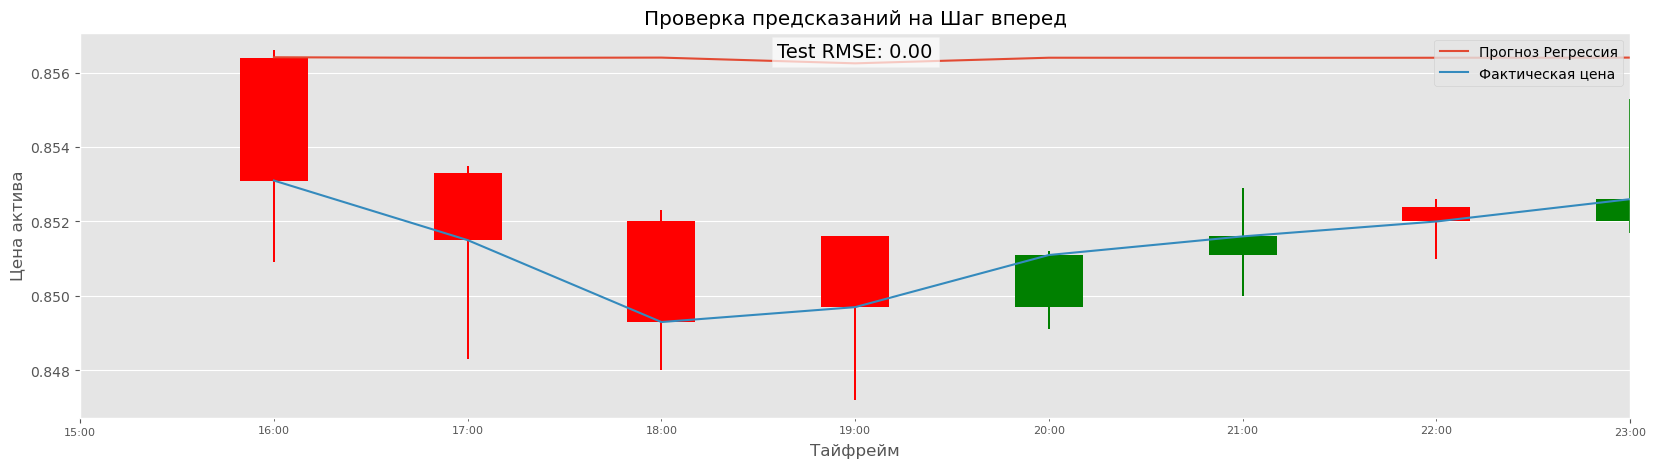

In [100]:
hr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', HuberRegressor())
])

hr_mod = train_model_future(hr, {}, X_future, y_future, y_fact)

<div style="border:solid gray 3px; padding: 20px">

Обучение проведено с помощью контейнера Pipeline для моделей регресии временных рядов. Для визуального сравнения качества моделей регрессии была создана таблица df_models с сохранением в ней лучших метрик RMSE на тренировочной и валидационной выборках. По итогам сравнения метрик лидируют модели ARDRegression, HuberRegressor, OrthogonalMatchingPursuit. При помощи функции визуализации моделей на экран выведены результаты обучения данных моделей в виде графиков. В среднем метрка RMSE на данных моделях на валидации показала результат 0,31. 

7. По результатам поиска оптимальной модели прогнозирования цен закрытия предсказания на одной из лучших моделей регресии с горизонтом 8 часов показали среднее качество RMSE = 0,05. Полученные предсказания с оценкой на японских свечах движения визуализированы на графике функцией train_model_future().

Финальное тестирование на train_model_future() и оценка качества прогнозных данных показала вполне приемлемый результат с ошибкой 0,01 пункта на регрессии HuberRegressor, что позволит успешно внедрить данный инструмент анализа в риск-менеджмент компании.

### 5.3.  Визуализация предсказаний на модели SARIMAX в Python

In [101]:
# Горизонт прогнозирования в часах вперед
HOUR = 12
# Кол-во строк для прогнозирования
DELTA = 24
# Срез по кол-ву дней по выборке для обучения и предсказаний
TIME_LEARN = 43800 # Это равно 5 лет: 43800 / (24ч * 360дн)
# Шаг прогнозирования
frequency = '1h'
# Размер скользящей средней (для дневок - это срез недельный)
mov_average = 24 # почасовой сдвиг (24ч)

Как реализовать модель SARIMAX (сезонная авторегрессионная интегрированная скользящая средняя) для прогнозирования сезонных данных с использованием Python в записной книжке Jupyter. 

SARIMAX (сезонное авторегрессионное интегрированное скользящее среднее с экзогенными факторами) — это обновленная версия модели ARIMA. Можно сказать, что SARIMAX — это сезонная модель, эквивалентная SARIMA и AutoARIMA. Эта модель также может иметь дело с внешними эффектами, именно этой особенностью модель отличается от других моделей.

Когда данные индексируются в форме, в которой точки данных представляют собой величину изменений, происходящих со временем, эти данные можно рассматривать как данные временных рядов. Например, единица продаж любого товара за определенную дату, неделю, месяц или год или изменение температуры со временем. Так что это одна из важных областей науки о данных, где мы прогнозируем будущую стоимость на основе истории временных рядов. В прогнозировании у нас есть множество моделей, которые помогают нам делать прогнозы и прогнозировать значения для реализации наших будущих аспектов в соответствии с требованиями ситуации. Примерами моделей могут быть AR, MA, ARIMA, SARIMA, VAR, SARIMAX и т. д.

Построим модель SARIMA для прогнозирования значений на 10 дней вперёд.

***5.3.1. Визуализация набора данных***

Давайте визуализируем цены закрытия по инструменту РусГидро за весь выгруженный период с 2018 по 2023 год. Код для создания этой визуализации выглядит следующим образом:

In [102]:
#Визуализация торговли акциями РусГидро с 2018 года
def visual(df):
    plt.figure(figsize=[12, 5]);
    df.plot(y='y', figsize = (14, 6), legend = True, color='g')
    plt.title('Фактическая закрытие по инструменту HYDR (РусГидро), ежемесячно')
    plt.ylabel('Цена закрытия')
    plt.xlabel('Дата')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [103]:
df_slice = df_features['2023-01-01':]
checking_dates(df_slice)   

--------- Анализ таблицы ----------
Имя DataFrame: "['df_slice']"
Минимальная дата в таблице :  2023-01-18 10:00:00 
Максимальная дата в таблице :  2023-10-02 15:00:00


<Figure size 1200x500 with 0 Axes>

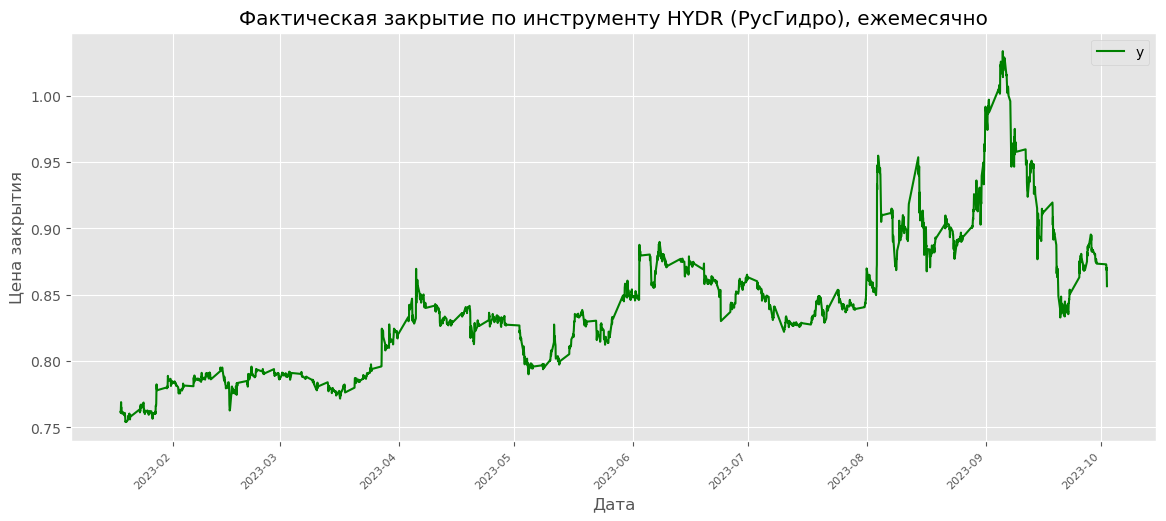

In [104]:
visual(df_slice)

***5.3.2. Проверка стационарности набора данных.***

Воспользуемся расширенным тестом Дики-Фуллера, хорошо известным статистическим тестом, который может помочь определить, является ли временной ряд стационарным. Тест ADF - это разновидность теста единичного корня. Единичные корни являются причиной нестационарности, тест ADF проверит, присутствует ли единичный корень. 

Нулевая гипотеза утверждает, что существует единичный корень. Если значение $p-value$ меньше заданного уровня значимости, мы отклоняем нулевую гипотезу о том, что временной ряд содержит единичный корень. Другими словами, отвергая гипотезу нулевого значения, мы можем сделать вывод, что временной ряд является стационарным.

In [105]:
# Дополненный тест Дики-Фуллера (ADF-тест)
ad_fuller_result = adfuller(df_slice['y'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.0607924189792524
p-value: 0.26056947269257325


Нулевая гипотеза не отвергается. Значение $p-value$ значительно больше 0,05. Ряд нестационарен.

***5.3.3. Различия***

Поскольку ряд не является стационарным, мы выполним дифференцирование значений цен закрытия в первом порядке и снова проведем тест ADF для набора данных.

In [106]:
df_slice['Close First Difference'] = df_slice['y'] - df_slice['y'].shift(1)
df_slice.dropna(subset = ["Close First Difference"], inplace=True)

In [107]:
ad_fuller_result = adfuller(df_slice['Close First Difference'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -13.330034912270342
p-value: 6.209747469639105e-25


***5.3.4. Визуализация различающихся серий***

Значение $p-value$ теперь меньше 0,05, что означает, что мы можем отклонить нулевую гипотезу, т.е. временной ряд является стационарным. Затем давайте визуализируем разностный ряд.

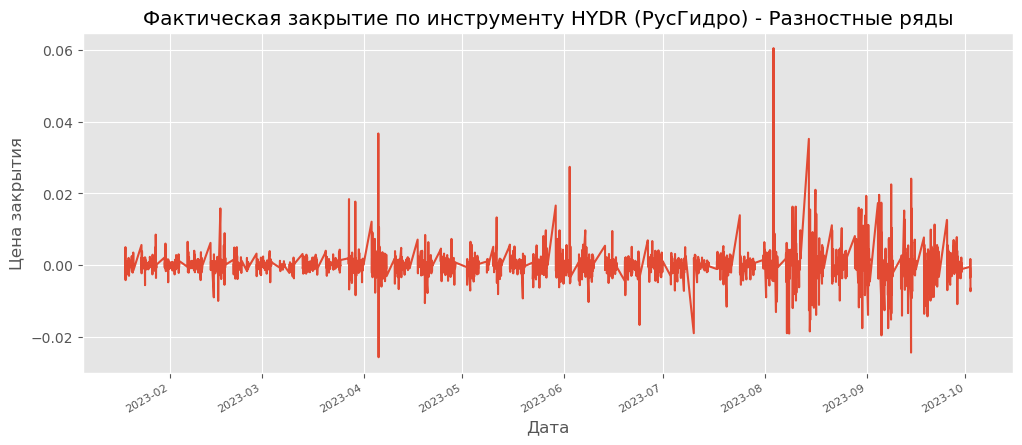

In [108]:
plt.figure(figsize=[12, 5]);
df_slice['Close First Difference'].plot()
plt.title('Фактическая закрытие по инструменту HYDR (РусГидро) - Разностные ряды')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)

***5.3.5. Графики ACF и PACF***

Использование Statsmodels library для построения графиков автокорреляции (ACF) и частичной автокорреляции из разностных рядов. ACF описывает, насколько хорошо текущая стоимость ряда связана с его прошлыми значениями, в то время как PACF находит корреляцию остатков со следующим значением запаздывания.

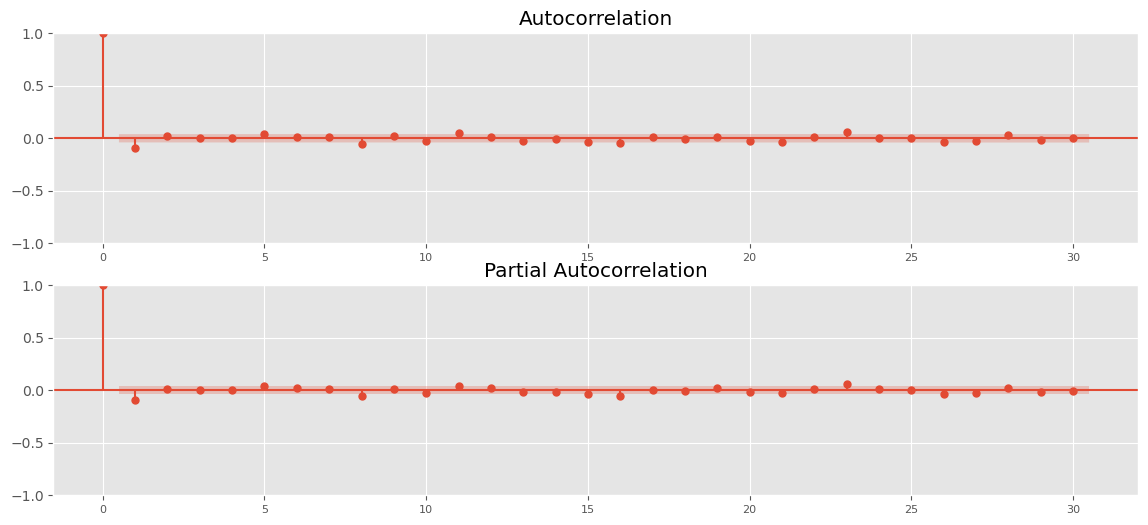

In [109]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_slice['Close First Difference'].dropna(),lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_slice['Close First Difference'].dropna(),lags=30,ax=ax2)

***5.3.6. Модель SARIMA***

После определения того, что наш временной ряд является стационарным, мы можем использовать модель SARIMA для прогнозирования будущих значений. Обозначение модели - задержка SARIMA (p, d, q) (P, D, Q). Эти три параметра учитывают сезонность, тенденцию и шум в данных. Мы будем использовать индикатор AIC (информационный критерий Акаике), который является оценкой относительного качества статистических моделей. Чем ниже значение AIC, тем лучше. 

*Авторегрессионная модель (AR)* - это статистическая модель, которая выражает зависимость одной переменной от более раннего периода времени. Мы можем выбрать порядок p для AR(p) модели на основе значительных скачков на графике PACF. Еще одним признаком процесса AR является то, что график ACF затухает медленнее.

Из приведенных выше графиков можно заключить, что график частичной автокорреляции PACF имеет значительные всплески при задержках 1, 5 и 8 из-за значительного значения. Для всего, что находится внутри оранжевой полосы, у нас нет доказательств того, что она отличается от нуля. Поэтому ограничимся p = 8.

*Скользящее среднее (MA)* - эта модель MA(q) вычисляет свое прогнозное значение, используя средневзвешенное значение прошлых ошибок. Она обладает способностью фиксировать тенденции и закономерности в данных временных рядов. В отличие от AR-модели, мы можем выбрать порядок q для модели MA(q) из ACF, если этот график имеет резкое ограничение после задержки q. 

Аналогично выбору p для AR-модели, чтобы выбрать подходящий q порядок для модели MA, нам нужно проанализировать все пики выше оранжевой области на графике ACF. В этом смысле, судя по графику ACF, мы можем попробовать использовать q равное 1, 5 или 8. Ограничимся также q = 8.

In [110]:
#Импортируем функцию для автоматического 
#подбора параметров модели ARIMA
from pmdarima import auto_arima

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(df_slice['Close First Difference'], 
                              start_p = 1, 
                              start_q = 1, 
                              max_p = 8, 
                              max_q = 8, 
                              m = 24, 
                              start_P = 0, 
                              seasonal = True,
                              d = None, 
                              D = 1, 
                              trace = True, 
                              error_action ='ignore', 
                              suppress_warnings = True,  
                              stepwise = True)
  
# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=-19920.701, Time=15.33 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-18527.864, Time=3.75 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-19281.187, Time=22.83 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-19920.426, Time=24.99 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-18529.858, Time=0.77 sec
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=-18562.246, Time=3.57 sec
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=71.77 sec
 ARIMA(1,0,1)(0,1,2)[24] intercept   : AIC=inf, Time=80.95 sec
 ARIMA(1,0,1)(1,1,0)[24] intercept   : AIC=-19280.002, Time=26.87 sec
 ARIMA(1,0,1)(1,1,2)[24] intercept   : AIC=inf, Time=49.05 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=-19922.029, Time=34.40 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-18563.768, Time=8.18 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=-19842.107, Time=16.29 sec
 ARIMA(1,0,0)(0,1,2)[24] intercept   : AIC=inf, Time=82.74 sec
 ARIMA(1,

После выполнения нескольких итераций модель предполагает, что SARIMAX (2, 0, 1) x (0, 1, 1, 24) со значением AIC -22547.005 является наилучшей комбинацией.

In [111]:
%%time
best_model = sm.tsa.statespace.SARIMAX(df_slice.y, order=(1, 0, 0), 
                                        seasonal_order=(0,1,1,24)).fit(disp=-1)

print(best_model.summary())  

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2497
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 24)   Log Likelihood               10075.409
Date:                              Sat, 18 Nov 2023   AIC                         -20144.819
Time:                                      12:02:59   BIC                         -20127.379
Sample:                                           0   HQIC                        -20138.484
                                             - 2497                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.001    902.340      0.000       0.996       1.001
ma.S.L24      -0.98

После того, как произведена подгонка модели к данным, проверим графики остатков, чтобы проверить достоверность подгонки модели. При хорошем методе прогнозирования в остатках должно остаться минимум информации, если таковая имеется.

In [112]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

Критерий Дики-Фуллера: p=0.000000


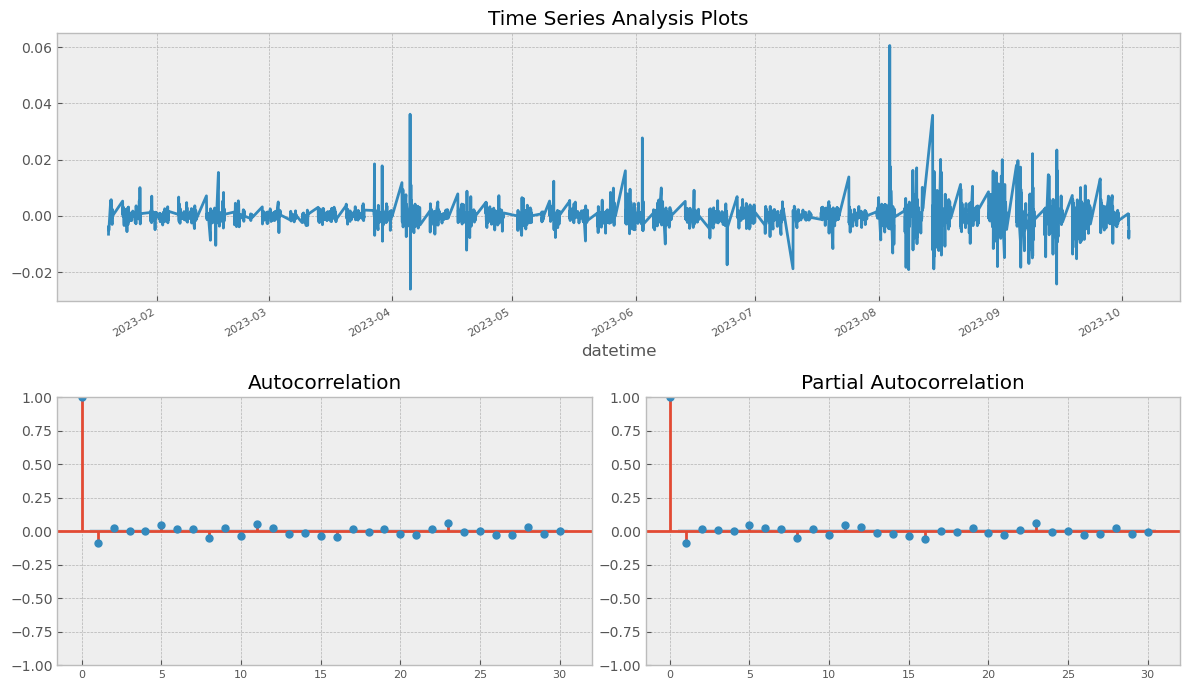

In [113]:
tsplot(best_model.resid[24:], lags=30)

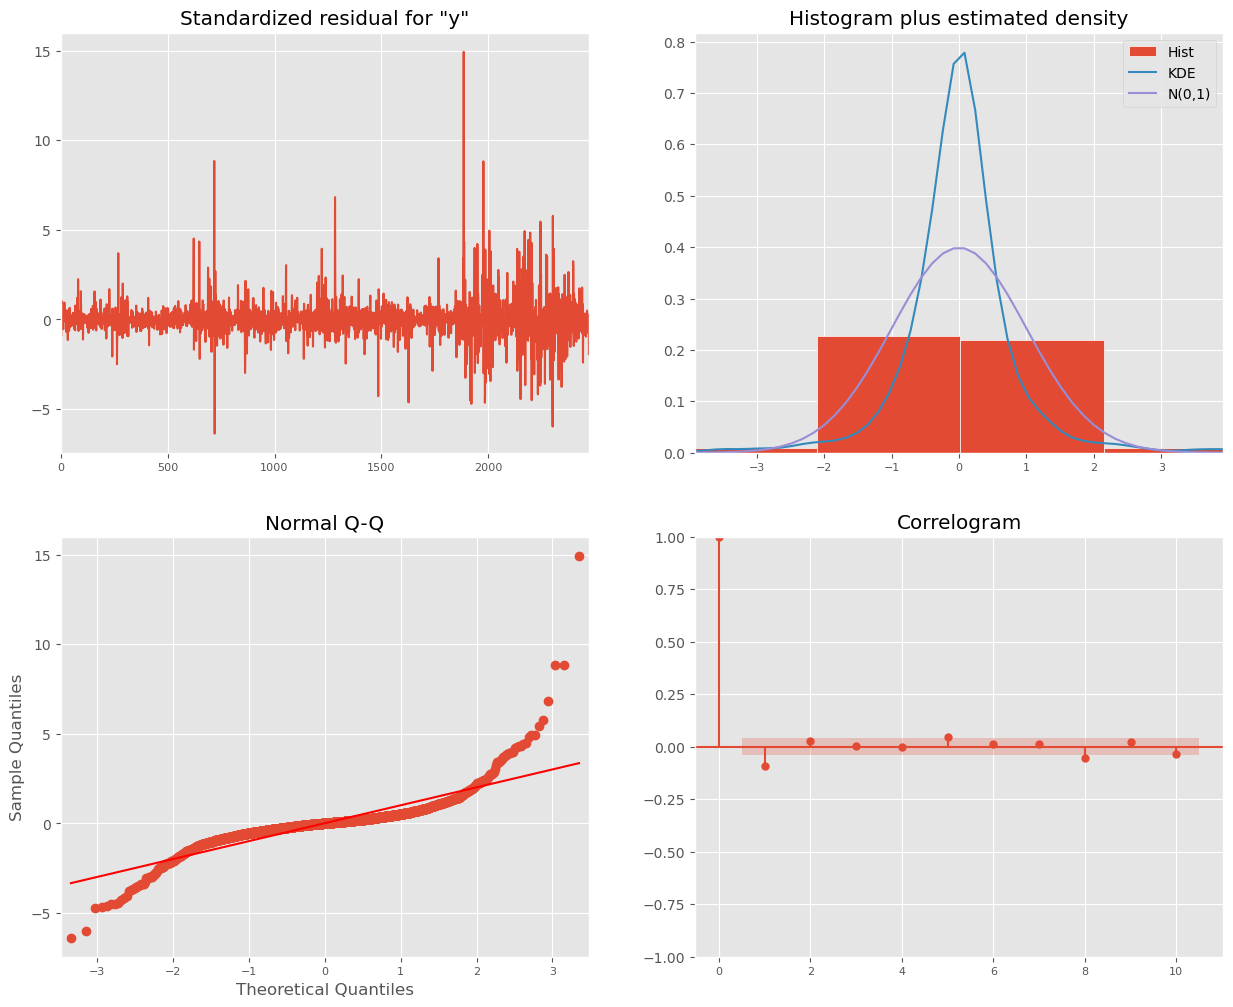

In [114]:
#Диагностика остатков модели
best_model.plot_diagnostics(figsize=(15,12));

Коррелограмма в правом нижнем углу предполагает, что в остатках нет автокорреляции, и поэтому они фактически представляют собой белый шум. Следовательно, эти остатки некоррелированы. Критерий Дики-Фуллера p=0.000000 подтверждает, что среднее значение отстатков близко к нулю и некоррелированы.

***5.3.7. Модельный прогноз***

На этапе прогноза попытаемся спрогнозировать данные о цене закрытия на следующие 240 этапов (часов) или 10 дней. График ниже показывает хорошее соответствие по сравнению с историческими данными.

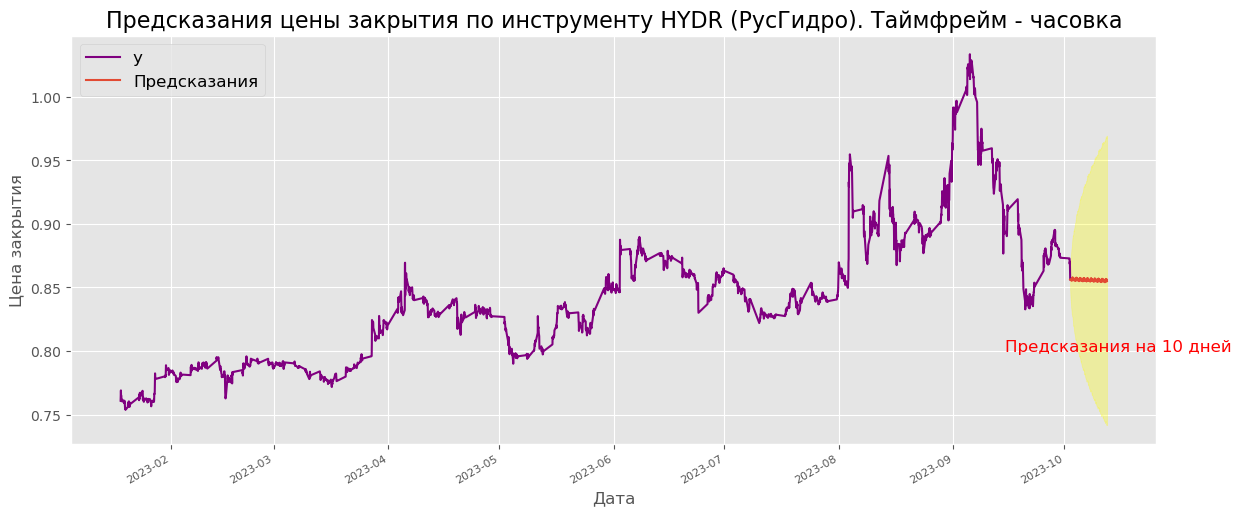

In [115]:
from pandas import Timestamp
STEPS = 240 # 240 часов вперёд
FREQ = "1h"

#Forecasting 10 years ahead
forecast_values = best_model.get_forecast(steps=STEPS)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()
#display('forecast_ci', forecast_ci.head())

range_data = pd.date_range(start=(df_slice.index.max()),
                        end=(df_slice.index.max()+(pd.to_timedelta(pd.np.ceil(STEPS-1), unit="h"))), freq=FREQ)

forecast_ci.insert(loc=0, column='date', value=range_data)

forecast_ci['datetime'] = pd.to_datetime(forecast_ci['date'])
forecast_ci = forecast_ci.set_index('datetime')
forecast_ci.drop(['date'], axis = 1, inplace = True)
forecast_ci['predict_mean'] = (forecast_ci['lower y'] + forecast_ci['upper y'])/2
#display('forecast_ci', forecast_ci.head())

#Относительно STEP расчитать кол-во часов в + будущее
#Далее эти даты приклеить к forecast_ci.count

#Получится допустим Датафрейм FURURE
#Затем нужно будет вывести их неа ПЛОТ

#Plot the data
ax = df_slice.plot(y='y', figsize = (14, 6), legend = True, color='purple')

#Plot the forecasted values 
#forecast_values = forecast_values.append(forecast_values.predicted_mean.plot(ax=ax, x='Datetime', label='Forecast', figsize = (14, 6), grid=True))

#Plot the forecasted values 
forecast_ci.predict_mean.plot(ax=ax, label='Предсказания', figsize = (14, 6), grid=True)


#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .3)
plt.title('Предсказания цены закрытия по инструменту HYDR (РусГидро). Таймфрейм - часовка', size = 16)
plt.xlabel('Дата', size=12)
plt.ylabel('Цена закрытия', size=12)
plt.legend(loc='upper left', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)
#annotation
ax.text(Timestamp("2023-09-15"), 0.8, 'Предсказания на 10 дней', fontsize=12,  color='red')
plt.show()

In [116]:
#y_fact

In [117]:
#forecast_ci.head()

Пришло время сравнить 

In [118]:
df_future = y_fact.merge(forecast_ci, how='inner', left_index=True, right_index=True)

In [119]:
checking_dates(df_future)
print('Всего строк для предсказания получилось: dfk =', df_future.shape[0])

--------- Анализ таблицы ----------
Имя DataFrame: "['df_future']"
Минимальная дата в таблице :  2023-10-02 16:00:00 
Максимальная дата в таблице :  2023-10-02 23:00:00
Всего строк для предсказания получилось: dfk = 8


In [120]:
# Функция визуализации инструмента торговли со свечами цен закрытия и предсказаний
def train_sarimax(model, parameters, X_valid, y_valid, y_future):
       
    if model.__class__.__name__ == 'Pipeline':
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(features_train, target_train)
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        print('Отработано на Pipeline')
    else:
        #Подготовка численных признаков к стандартизации данных
        num_features_train = X.select_dtypes(exclude='object').columns.to_list()
        # создаём скелер
        scaler = StandardScaler()
        # обучаем X_train на численных признаках тренировочной выборки и трансформируем её
        X[num_features_train] = scaler.fit_transform(X[num_features_train])
        #y = scaler.fit_transform(y)    
        # обучаем X_test на численных признаках тренировочной выборки и трансформируем её
        X_valid[num_features_train] = scaler.fit_transform(X_valid[num_features_train])
        #y_valid = scaler.fit_transform(y_valid)    
        gscv = GridSearchCV(model, parameters, n_jobs=-1, cv=tscv, scoring=rmse_score)
        gscv.fit(X, y)
        print('Отработано с помощью Скелера')
    
    if gscv.best_params_:
        print('\nBest parameters:')
        for param_name, val in gscv.best_params_.items():
            print(f'{param_name}: {val}')
            
    estimator_name = gscv.best_estimator_.__class__.__name__
    
    if estimator_name == 'Pipeline':
        estimator_name = gscv.best_estimator_[-1].__class__.__name__
        
    # получим предсказания обученной модели на тестовой выборке Test и сравним с целевым показателем 
    y_pred = gscv.predict(X_valid)
    result_test = rmse(y_valid, y_pred)   
    array = y_pred
    array.tolist()
    series = pd.DataFrame(array.tolist(), columns=['name']) 
    #print(series)
    # Строим результаты сравнения истинных значений с предсказанными
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5))
  
    pd.DataFrame(np.array([series['name'], df_future['predict_mean'], y_future['close']]).T, 
          columns=['Прогноз Регрессия', 'Прогноз SARIMAX', 'Фактическая цена'], 
          index=y_valid.index).plot(ax=ax, figsize=(20, 5),
          title = 'Проверка предсказаний на Шаг вперед',
          ylabel = 'Цена актива',
          xlabel = 'Тайфрейм')
    
    #define width of candlestick elements
    width = .35
    width2 = .01

    #define up and down prices
    up = y_future[y_future.close >= y_future.open]
    down = y_future[y_future.close < y_future.open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
    plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
    plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

    #plot down prices
    plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
    plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
    plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

    #rotate x-axis tick labels
    #plt.xticks(rotation=45, ha='right')
    
    plt.text(0.5, 0.95, f'Test RMSE: {round(result_test,5):.2f}', horizontalalignment='center', verticalalignment='center',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7), fontsize=14)
    plt.legend(loc='upper right')
    plt.xlim((y_valid.index.min() - (pd.to_timedelta(pd.np.ceil(5), unit="m"))), 
             (y_valid.index.max() + (pd.to_timedelta(pd.np.ceil(5), unit="m"))))
    #display candlestick chart
    plt.show() 
    
    return gscv.best_estimator_

Отработано на Pipeline


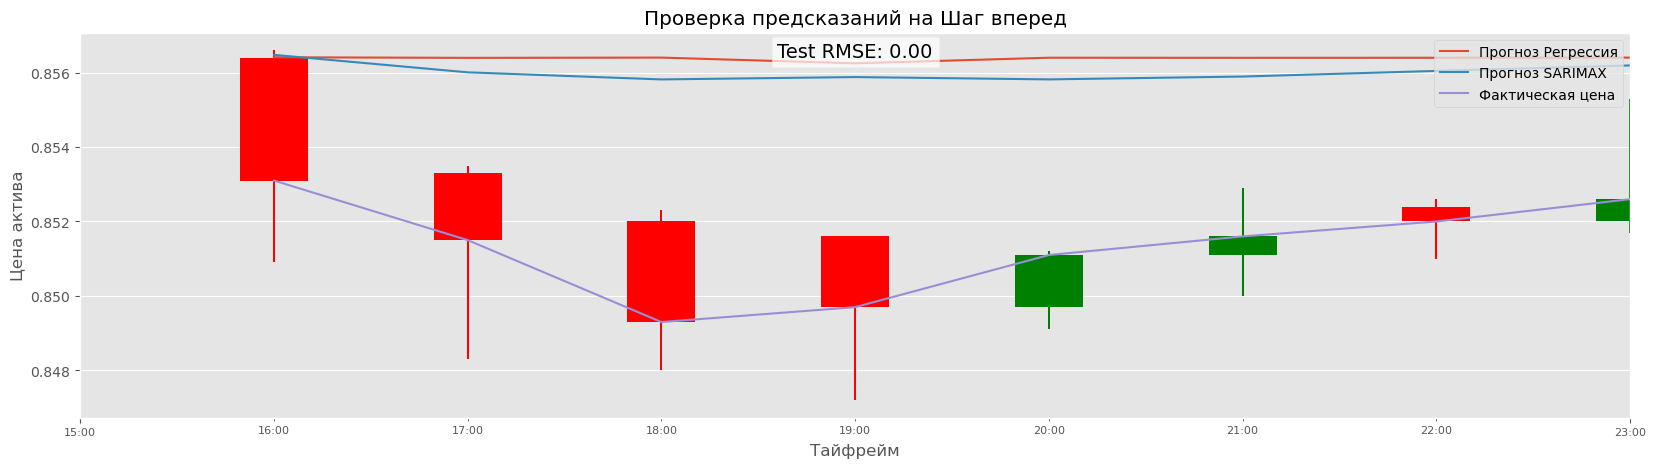

In [121]:
hr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', HuberRegressor())
])

hr_mod = train_sarimax(hr, {}, X_future, y_future, y_fact)

***5.3.8. Проверка прогноза***.

Чтобы оценить производительность модели, мы вычисляем оценку R-квадрат и среднеквадратичную ошибку моего набора данных, чтобы проверить подлинность модели.

$R^2$ показывает, насколько хорошо модель соответствует заданному набору данных. Он указывает, насколько близка линия регрессии (т.е. нанесенные на график прогнозируемые значения) к фактическим значениям данных. Значение $R^2$ находится между 0 и 1, где 0 означает, что эта модель не соответствует заданным данным, а 1 означает, что модель идеально соответствует предоставленному набору данных.

Среднеквадратичная ошибка $(RMSE)$ - это среднее расстояние между точкой данных от подобранной линии, измеренное вдоль вертикальной линии.

In [122]:
#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = df_slice[:int(0.85*(len(df_slice)))]
test = df_slice[int(0.85*(len(df_slice))):]
start=len(train)
end=len(train)+len(test)-1
predictions = best_model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['y'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mse(test['y'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['y'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['y'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['y'])
                                                               /np.abs(test['y']))*100 
evaluation_results

r2_score  mean_absolute_error  mean_squared_error  root_mean_squared_error  \
0  0.986952             0.004105            0.000036                  0.00599   

   mean_absolute_percentage_error  
0                        0.446145

## Общий итог

<div style="border:solid gray 3px; padding: 20px">

Итак, модель SARIMAX имеет точность 98,7%, что вполне прилично.

Значение RMSE 0,00599 можно напрямую интерпретировать в ценах актива, и оно совсем невелико.
По графику на свечах видно, что прогноз ARIMA немного лучше прогнозирует цены, чем обычная линейная регрессия с лагами. И это учитывая только дневную сезонность, хотя у ARIMA можно вывести и недельную сезонность.

Можно быть уверенным в способности моделей точно прогнозировать значения цены закрытия в будущем. Хотя линейная регрессия показывает еплохой результат, она все же может очень сильно и испортить собственные прогнозы, т.к. сильно зависит от искуственно созданных лагов в будущее. В ARIMA этот недостаток отсутствует. Поэтому оставляем предпочтение именно этой модели. 

Спасибо за чтение.